In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Import alpaca-py as alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoLatestQuoteRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

In [5]:
# Declaring variable for client
client = CryptoHistoricalDataClient()

In [6]:
# Setting up params for request
request_params = CryptoLatestQuoteRequest(symbol_or_symbols="BTC/USD")

In [7]:
# Grabbing latest price with client
latest_quote = client.get_crypto_latest_quote(request_params)

In [8]:
# must use symbol to access even though it is single symbol
latest_quote["BTC/USD"].ask_price

22922.21

In [9]:
# Updating params for historical price data
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime.strptime("2020-04-01", '%Y-%m-%d')
                        )

In [10]:
# Grabbing historical data
bars = client.get_crypto_bars(request_params)

In [11]:
# convert to dataframe
bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-02-04 06:00:00+00:00  23311.37  23588.17  23242.44  23391.58   
        2023-02-05 06:00:00+00:00  23388.66  23436.93  22759.78  22882.54   
        2023-02-06 06:00:00+00:00  17020.33  23154.70  17020.33  22938.35   
        2023-02-07 06:00:00+00:00  22938.96  23444.91  22770.00  23227.30   
        2023-02-08 06:00:00+00:00  23227.02  23238.92  22675.02  22917.98   

                                        volume  trade_count          vwap  
symbol  timestamp                                                          
BTC/USD 2020-04-08 05:00:00+00:00     0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.013400          3.0   8715.805970  
...                                        ...          ...           ...  
        2023-02-04 06:00:00+00:00  3055.763529      78984.0  23386.837165  
        2023-02-05 06:00:00+00:00  4232.139675      91116.0  23051.815007  
        2023-02-06 06:00:00+00:00  3523.052428      75979.0  22925.089557  
        2023-02-07 06:00:00+00:00  6678.001118     139139.0  23102.683165  
        2023-02-08 06:00:00+00:00  5499.356876     134364.0  22976.908366  

[1007 rows x 7 columns]

In [12]:
# Setting as dataframe variable
btc_df = bars.df
btc_df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-02-04 06:00:00+00:00  23311.37  23588.17  23242.44  23391.58   
        2023-02-05 06:00:00+00:00  23388.66  23436.93  22759.78  22882.54   
        2023-02-06 06:00:00+00:00  17020.33  23154.70  17020.33  22938.35   
        2023-02-07 06:00:00+00:00  22938.96  23444.91  22770.00  23227.30   
        2023-02-08 06:00:00+00:00  23227.02  23238.92  22675.02  22917.98   

                                        volume  trade_count          vwap  
symbol  timestamp                                                          
BTC/USD 2020-04-08 05:00:00+00:00     0.000100          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.000200          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.000100          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.084000          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.013400          3.0   8715.805970  
...                                        ...          ...           ...  
        2023-02-04 06:00:00+00:00  3055.763529      78984.0  23386.837165  
        2023-02-05 06:00:00+00:00  4232.139675      91116.0  23051.815007  
        2023-02-06 06:00:00+00:00  3523.052428      75979.0  22925.089557  
        2023-02-07 06:00:00+00:00  6678.001118     139139.0  23102.683165  
        2023-02-08 06:00:00+00:00  5499.356876     134364.0  22976.908366  

[1007 rows x 7 columns]

In [13]:
# Checking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1007 entries, ('BTC/USD', Timestamp('2020-04-08 05:00:00+0000', tz='UTC')) to ('BTC/USD', Timestamp('2023-02-08 06:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         1007 non-null   float64
 1   high         1007 non-null   float64
 2   low          1007 non-null   float64
 3   close        1007 non-null   float64
 4   volume       1007 non-null   float64
 5   trade_count  1007 non-null   float64
 6   vwap         1007 non-null   float64
dtypes: float64(7)
memory usage: 98.4+ KB


In [14]:
# Reset index to access symbol and timestamp as columns
btc_df = btc_df.reset_index()
btc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,BTC/USD,2020-04-08 05:00:00+00:00,7314.00,7314.00,7314.00,7314.00,0.000100,1.0,7314.000000
1,BTC/USD,2020-04-14 05:00:00+00:00,7101.50,7101.50,7100.00,7100.00,0.000200,2.0,7100.750000
2,BTC/USD,2020-04-22 05:00:00+00:00,7118.50,7118.50,7118.50,7118.50,0.000100,1.0,7118.500000
3,BTC/USD,2020-04-28 05:00:00+00:00,7748.50,7836.00,7748.50,7836.00,0.084000,2.0,7835.687500
4,BTC/USD,2020-04-30 05:00:00+00:00,8829.00,8829.00,8653.00,8653.00,0.013400,3.0,8715.805970
...,...,...,...,...,...,...,...,...,...
1002,BTC/USD,2023-02-04 06:00:00+00:00,23311.37,23588.17,23242.44,23391.58,3055.763529,78984.0,23386.837165
1003,BTC/USD,2023-02-05 06:00:00+00:00,23388.66,23436.93,22759.78,22882.54,4232.139675,91116.0,23051.815007
1004,BTC/USD,2023-02-06 06:00:00+00:00,17020.33,23154.70,17020.33,22938.35,3523.052428,75979.0,22925.089557
1005,BTC/USD,2023-02-07 06:00:00+00:00,22938.96,23444.91,22770.00,23227.30,6678.001118,139139.0,23102.683165


In [15]:
# Revising time out of timestamp column
import datetime as dt
btc_df['timestamp'] = btc_df['timestamp'].dt.date
btc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,BTC/USD,2020-04-08,7314.00,7314.00,7314.00,7314.00,0.000100,1.0,7314.000000
1,BTC/USD,2020-04-14,7101.50,7101.50,7100.00,7100.00,0.000200,2.0,7100.750000
2,BTC/USD,2020-04-22,7118.50,7118.50,7118.50,7118.50,0.000100,1.0,7118.500000
3,BTC/USD,2020-04-28,7748.50,7836.00,7748.50,7836.00,0.084000,2.0,7835.687500
4,BTC/USD,2020-04-30,8829.00,8829.00,8653.00,8653.00,0.013400,3.0,8715.805970
...,...,...,...,...,...,...,...,...,...
1002,BTC/USD,2023-02-04,23311.37,23588.17,23242.44,23391.58,3055.763529,78984.0,23386.837165
1003,BTC/USD,2023-02-05,23388.66,23436.93,22759.78,22882.54,4232.139675,91116.0,23051.815007
1004,BTC/USD,2023-02-06,17020.33,23154.70,17020.33,22938.35,3523.052428,75979.0,22925.089557
1005,BTC/USD,2023-02-07,22938.96,23444.91,22770.00,23227.30,6678.001118,139139.0,23102.683165


In [16]:
# Setting up pivot to get subset of closing prices
btc_pivot = btc_df.pivot_table(values='close', index='timestamp', columns='symbol')
btc_pivot

symbol,BTC/USD
timestamp,
2020-04-08,7314.00
2020-04-14,7100.00
2020-04-22,7118.50
2020-04-28,7836.00
2020-04-30,8653.00
...,...
2023-02-04,23391.58
2023-02-05,22882.54
2023-02-06,22938.35


In [17]:
# Checking for nulls
btc_pivot.isnull().sum()

symbol
BTC/USD    0
dtype: int64

In [18]:
# Running percentage change calculation and conversion
btc_daily = btc_pivot.pct_change()
btc_daily

symbol,BTC/USD
timestamp,
2020-04-08,NaN
2020-04-14,-0.029259
2020-04-22,0.002606
2020-04-28,0.100794
2020-04-30,0.104262
...,...
2023-02-04,0.003337
2023-02-05,-0.021762
2023-02-06,0.002439


In [19]:
# Recheck nulls
btc_daily.isnull().sum()

symbol
BTC/USD    1
dtype: int64

In [20]:
# Drop nulls
btc_daily = btc_daily.dropna()
btc_daily

symbol,BTC/USD
timestamp,
2020-04-14,-0.029259
2020-04-22,0.002606
2020-04-28,0.100794
2020-04-30,0.104262
2020-05-01,0.018895
...,...
2023-02-04,0.003337
2023-02-05,-0.021762
2023-02-06,0.002439


In [21]:
# Checking info
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2020-04-14 to 2023-02-08
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC/USD  1006 non-null   float64
dtypes: float64(1)
memory usage: 15.7+ KB


In [22]:
# Setting up dependencies for stock price data
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest

In [23]:
# keys required for stock historical data client
stock_client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

In [24]:
# params request for multiple tickers
multisymbol_request_params = StockBarsRequest(symbol_or_symbols=["SPY", "GLD", "TLT"],
                                              timeframe=TimeFrame.Day, 
                                              start=datetime.strptime("2020-04-08", '%Y-%m-%d')
                                             )

In [25]:
# pulling data
historical_quotes = stock_client.get_stock_bars(multisymbol_request_params)

In [26]:
# Display as dataframe
historical_quotes.df

open     high       low   close  \
symbol timestamp                                                      
GLD    2020-04-08 04:00:00+00:00  155.91  155.940  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.080  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.380  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.420  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.540  160.8061  162.00   
...                                  ...      ...       ...     ...   
TLT    2023-02-02 05:00:00+00:00  108.92  109.352  108.0850  108.32   
       2023-02-03 05:00:00+00:00  106.77  107.110  106.0800  106.70   
       2023-02-06 05:00:00+00:00  105.75  106.305  105.6800  105.91   
       2023-02-07 05:00:00+00:00  105.33  106.230  105.0000  105.06   
       2023-02-08 05:00:00+00:00  105.04  105.580  104.3900  105.56   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-02-02 05:00:00+00:00  19618843.0     133699.0  108.592748  
       2023-02-03 05:00:00+00:00  20619484.0     114736.0  106.727918  
       2023-02-06 05:00:00+00:00  15185832.0      83202.0  105.931861  
       2023-02-07 05:00:00+00:00  18290306.0     107708.0  105.469238  
       2023-02-08 05:00:00+00:00  13530655.0      92240.0  105.047203  

[2145 rows x 7 columns]

In [27]:
# Save as df variable
stock_df = historical_quotes.df
stock_df

open     high       low   close  \
symbol timestamp                                                      
GLD    2020-04-08 04:00:00+00:00  155.91  155.940  154.5900  154.65   
       2020-04-09 04:00:00+00:00  158.08  159.080  157.2100  158.58   
       2020-04-13 04:00:00+00:00  159.17  162.380  158.6250  161.41   
       2020-04-14 04:00:00+00:00  162.73  164.420  161.7800  162.66   
       2020-04-15 04:00:00+00:00  161.80  162.540  160.8061  162.00   
...                                  ...      ...       ...     ...   
TLT    2023-02-02 05:00:00+00:00  108.92  109.352  108.0850  108.32   
       2023-02-03 05:00:00+00:00  106.77  107.110  106.0800  106.70   
       2023-02-06 05:00:00+00:00  105.75  106.305  105.6800  105.91   
       2023-02-07 05:00:00+00:00  105.33  106.230  105.0000  105.06   
       2023-02-08 05:00:00+00:00  105.04  105.580  104.3900  105.56   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-02-02 05:00:00+00:00  19618843.0     133699.0  108.592748  
       2023-02-03 05:00:00+00:00  20619484.0     114736.0  106.727918  
       2023-02-06 05:00:00+00:00  15185832.0      83202.0  105.931861  
       2023-02-07 05:00:00+00:00  18290306.0     107708.0  105.469238  
       2023-02-08 05:00:00+00:00  13530655.0      92240.0  105.047203  

[2145 rows x 7 columns]

In [28]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2145 entries, ('GLD', Timestamp('2020-04-08 04:00:00+0000', tz='UTC')) to ('TLT', Timestamp('2023-02-08 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2145 non-null   float64
 1   high         2145 non-null   float64
 2   low          2145 non-null   float64
 3   close        2145 non-null   float64
 4   volume       2145 non-null   float64
 5   trade_count  2145 non-null   float64
 6   vwap         2145 non-null   float64
dtypes: float64(7)
memory usage: 145.6+ KB


In [29]:
# Reset index to access symbol and timestamp as columns
stock_df = stock_df.reset_index()
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08 04:00:00+00:00,155.91,155.940,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09 04:00:00+00:00,158.08,159.080,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13 04:00:00+00:00,159.17,162.380,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14 04:00:00+00:00,162.73,164.420,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15 04:00:00+00:00,161.80,162.540,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
2140,TLT,2023-02-02 05:00:00+00:00,108.92,109.352,108.0850,108.32,19618843.0,133699.0,108.592748
2141,TLT,2023-02-03 05:00:00+00:00,106.77,107.110,106.0800,106.70,20619484.0,114736.0,106.727918
2142,TLT,2023-02-06 05:00:00+00:00,105.75,106.305,105.6800,105.91,15185832.0,83202.0,105.931861
2143,TLT,2023-02-07 05:00:00+00:00,105.33,106.230,105.0000,105.06,18290306.0,107708.0,105.469238


In [30]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       2145 non-null   object             
 1   timestamp    2145 non-null   datetime64[ns, UTC]
 2   open         2145 non-null   float64            
 3   high         2145 non-null   float64            
 4   low          2145 non-null   float64            
 5   close        2145 non-null   float64            
 6   volume       2145 non-null   float64            
 7   trade_count  2145 non-null   float64            
 8   vwap         2145 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 150.9+ KB


In [31]:
# Revising time out of timestamp column
stock_df['timestamp'] = stock_df['timestamp'].dt.date
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08,155.91,155.940,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09,158.08,159.080,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13,159.17,162.380,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14,162.73,164.420,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15,161.80,162.540,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
2140,TLT,2023-02-02,108.92,109.352,108.0850,108.32,19618843.0,133699.0,108.592748
2141,TLT,2023-02-03,106.77,107.110,106.0800,106.70,20619484.0,114736.0,106.727918
2142,TLT,2023-02-06,105.75,106.305,105.6800,105.91,15185832.0,83202.0,105.931861
2143,TLT,2023-02-07,105.33,106.230,105.0000,105.06,18290306.0,107708.0,105.469238


In [32]:
# Subset of SPY only
loc_df = stock_df.loc[(stock_df.symbol == 'SPY'), :]
loc_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
715,SPY,2020-04-08,267.96,276.0000,265.2542,274.00,153774487.0,950859.0,271.051454
716,SPY,2020-04-09,277.58,281.2000,275.4700,278.22,190283195.0,1171999.0,278.251697
717,SPY,2020-04-13,277.14,277.5100,271.4100,275.63,114868253.0,752225.0,274.512847
718,SPY,2020-04-14,280.98,284.9000,275.5106,283.80,134143470.0,761246.0,282.089774
719,SPY,2020-04-15,277.57,283.9407,275.4600,277.75,121779042.0,711140.0,277.826041
...,...,...,...,...,...,...,...,...,...
1425,SPY,2023-02-02,414.86,418.3100,412.8800,416.78,101669441.0,725256.0,415.525046
1426,SPY,2023-02-03,411.59,416.9700,411.0900,412.35,94736781.0,665742.0,413.767228
1427,SPY,2023-02-06,409.79,411.2900,408.1000,409.83,60311136.0,462046.0,409.992157
1428,SPY,2023-02-07,408.87,416.4900,407.5700,415.19,90989356.0,695497.0,411.996722


In [33]:
# Pivot for SPY
spy_pivot = loc_df.pivot_table(values='close', index='timestamp', columns='symbol')
spy_pivot

symbol,SPY
timestamp,
2020-04-08,274.00
2020-04-09,278.22
2020-04-13,275.63
2020-04-14,283.80
2020-04-15,277.75
...,...
2023-02-02,416.78
2023-02-03,412.35
2023-02-06,409.83


In [34]:
# Checking info
spy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 2020-04-08 to 2023-02-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     715 non-null    float64
dtypes: float64(1)
memory usage: 11.2+ KB


In [35]:
# Running percentage change calculation and conversion
spy_daily = spy_pivot.pct_change()
spy_daily

symbol,SPY
timestamp,
2020-04-08,NaN
2020-04-09,0.015401
2020-04-13,-0.009309
2020-04-14,0.029641
2020-04-15,-0.021318
...,...
2023-02-02,0.014557
2023-02-03,-0.010629
2023-02-06,-0.006111


In [36]:
# Dropping nulls
spy_daily = spy_daily.dropna()
spy_daily

symbol,SPY
timestamp,
2020-04-09,0.015401
2020-04-13,-0.009309
2020-04-14,0.029641
2020-04-15,-0.021318
2020-04-16,0.004356
...,...
2023-02-02,0.014557
2023-02-03,-0.010629
2023-02-06,-0.006111


In [37]:
# Subset of GLD only
gld_df = stock_df.loc[(stock_df.symbol == 'GLD'), :]
gld_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08,155.910,155.940,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09,158.080,159.080,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13,159.170,162.380,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14,162.730,164.420,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15,161.800,162.540,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
710,GLD,2023-02-02,181.080,181.110,177.7400,177.90,8843587.0,63088.0,178.674234
711,GLD,2023-02-03,174.920,175.430,173.1200,173.46,13674441.0,91886.0,174.076994
712,GLD,2023-02-06,174.110,174.455,173.2800,173.82,8957391.0,46601.0,173.761973
713,GLD,2023-02-07,173.720,175.270,173.4700,173.98,6794153.0,52482.0,174.252726


In [38]:
# Pivot for GLD
gld_pivot = gld_df.pivot_table(values='close', index='timestamp', columns='symbol')
gld_pivot

symbol,GLD
timestamp,
2020-04-08,154.65
2020-04-09,158.58
2020-04-13,161.41
2020-04-14,162.66
2020-04-15,162.00
...,...
2023-02-02,177.90
2023-02-03,173.46
2023-02-06,173.82


In [39]:
# Checking info
gld_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 2020-04-08 to 2023-02-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     715 non-null    float64
dtypes: float64(1)
memory usage: 11.2+ KB


In [40]:
# Running percentage change calculation and conversion
gld_daily = gld_pivot.pct_change()
gld_daily

symbol,GLD
timestamp,
2020-04-08,NaN
2020-04-09,0.025412
2020-04-13,0.017846
2020-04-14,0.007744
2020-04-15,-0.004058
...,...
2023-02-02,-0.020752
2023-02-03,-0.024958
2023-02-06,0.002075


In [41]:
# Dropping nulls
gld_daily = gld_daily.dropna()
gld_daily

symbol,GLD
timestamp,
2020-04-09,0.025412
2020-04-13,0.017846
2020-04-14,0.007744
2020-04-15,-0.004058
2020-04-16,-0.001790
...,...
2023-02-02,-0.020752
2023-02-03,-0.024958
2023-02-06,0.002075


In [42]:
# Subset of TLT only
tlt_df = stock_df.loc[(stock_df.symbol == 'TLT'), :]
tlt_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
1430,TLT,2020-04-08,165.11,166.190,164.130,165.09,10147077.0,63686.0,165.217491
1431,TLT,2020-04-09,164.28,165.790,163.780,165.39,14260806.0,82515.0,164.996594
1432,TLT,2020-04-13,164.75,165.710,163.880,163.88,8750297.0,60771.0,164.679842
1433,TLT,2020-04-14,163.84,164.740,163.480,163.84,9019531.0,62051.0,164.073826
1434,TLT,2020-04-15,166.80,168.600,166.740,168.18,10027752.0,63827.0,167.874800
...,...,...,...,...,...,...,...,...,...
2140,TLT,2023-02-02,108.92,109.352,108.085,108.32,19618843.0,133699.0,108.592748
2141,TLT,2023-02-03,106.77,107.110,106.080,106.70,20619484.0,114736.0,106.727918
2142,TLT,2023-02-06,105.75,106.305,105.680,105.91,15185832.0,83202.0,105.931861
2143,TLT,2023-02-07,105.33,106.230,105.000,105.06,18290306.0,107708.0,105.469238


In [43]:
# Pivot for TLT
tlt_pivot = tlt_df.pivot_table(values='close', index='timestamp', columns='symbol')
tlt_pivot

symbol,TLT
timestamp,
2020-04-08,165.09
2020-04-09,165.39
2020-04-13,163.88
2020-04-14,163.84
2020-04-15,168.18
...,...
2023-02-02,108.32
2023-02-03,106.70
2023-02-06,105.91


In [44]:
# Checking info
tlt_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 2020-04-08 to 2023-02-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TLT     715 non-null    float64
dtypes: float64(1)
memory usage: 11.2+ KB


In [45]:
# Running percentage change calculation and conversion
tlt_daily = tlt_pivot.pct_change()
tlt_daily

symbol,TLT
timestamp,
2020-04-08,NaN
2020-04-09,0.001817
2020-04-13,-0.009130
2020-04-14,-0.000244
2020-04-15,0.026489
...,...
2023-02-02,0.001294
2023-02-03,-0.014956
2023-02-06,-0.007404


In [46]:
# Dropping nulls
tlt_daily = tlt_daily.dropna()
tlt_daily

symbol,TLT
timestamp,
2020-04-09,0.001817
2020-04-13,-0.009130
2020-04-14,-0.000244
2020-04-15,0.026489
2020-04-16,0.011357
...,...
2023-02-02,0.001294
2023-02-03,-0.014956
2023-02-06,-0.007404


In [47]:
# Running cumprod (cumulative product) function over BTC Daily Returns to calculate overall gain / loss
BTC_cumprod = (1 + btc_daily).cumprod()
BTC_prod_annotation = (BTC_cumprod.iloc[-1][0]*100).round().astype(int)
BTC_cumprod

symbol,BTC/USD
timestamp,
2020-04-14,0.970741
2020-04-22,0.973270
2020-04-28,1.071370
2020-04-30,1.183074
2020-05-01,1.205428
...,...
2023-02-04,3.198193
2023-02-05,3.128594
2023-02-06,3.136225


In [48]:
# Running cumprod (cumulative product) function over SPY Daily Returns to calculate overall gain / loss
SPY_cumprod = (1 + spy_daily).cumprod()
SPY_prod_annotation = (SPY_cumprod.iloc[-1][0]*100).round().astype(int)
SPY_cumprod

symbol,SPY
timestamp,
2020-04-09,1.015401
2020-04-13,1.005949
2020-04-14,1.035766
2020-04-15,1.013686
2020-04-16,1.018102
...,...
2023-02-02,1.521095
2023-02-03,1.504927
2023-02-06,1.495730


In [49]:
# Running cumprod (cumulative product) function over GLD Daily Returns to calculate overall gain / loss
GLD_cumprod = (1 + gld_daily).cumprod()
GLD_prod_annotation = (GLD_cumprod.iloc[-1][0]*100).round().astype(int)
GLD_cumprod

symbol,GLD
timestamp,
2020-04-09,1.025412
2020-04-13,1.043712
2020-04-14,1.051794
2020-04-15,1.047527
2020-04-16,1.045651
...,...
2023-02-02,1.150339
2023-02-03,1.121629
2023-02-06,1.123957


In [50]:
# Running cumprod (cumulative product) function over TLT Daily Returns to calculate overall gain / loss
TLT_cumprod = (1 + tlt_daily).cumprod()
TLT_prod_annotation = (TLT_cumprod.iloc[-1][0]*100).round().astype(int)
TLT_cumprod

symbol,TLT
timestamp,
2020-04-09,1.001817
2020-04-13,0.992671
2020-04-14,0.992428
2020-04-15,1.018717
2020-04-16,1.030287
...,...
2023-02-02,0.656127
2023-02-03,0.646314
2023-02-06,0.641529


In [51]:
# Running cumulative return against initial investment to obtain current market value of investment in BTC
initial_investment = 10000
btc_profit = initial_investment * BTC_cumprod
btc_annotation = btc_profit.iloc[-1][0].round().astype(int)
btc_profit

symbol,BTC/USD
timestamp,
2020-04-14,9707.410446
2020-04-22,9732.704403
2020-04-28,10713.699754
2020-04-30,11830.735576
2020-05-01,12054.279464
...,...
2023-02-04,31981.925075
2023-02-05,31285.944763
2023-02-06,31362.250479


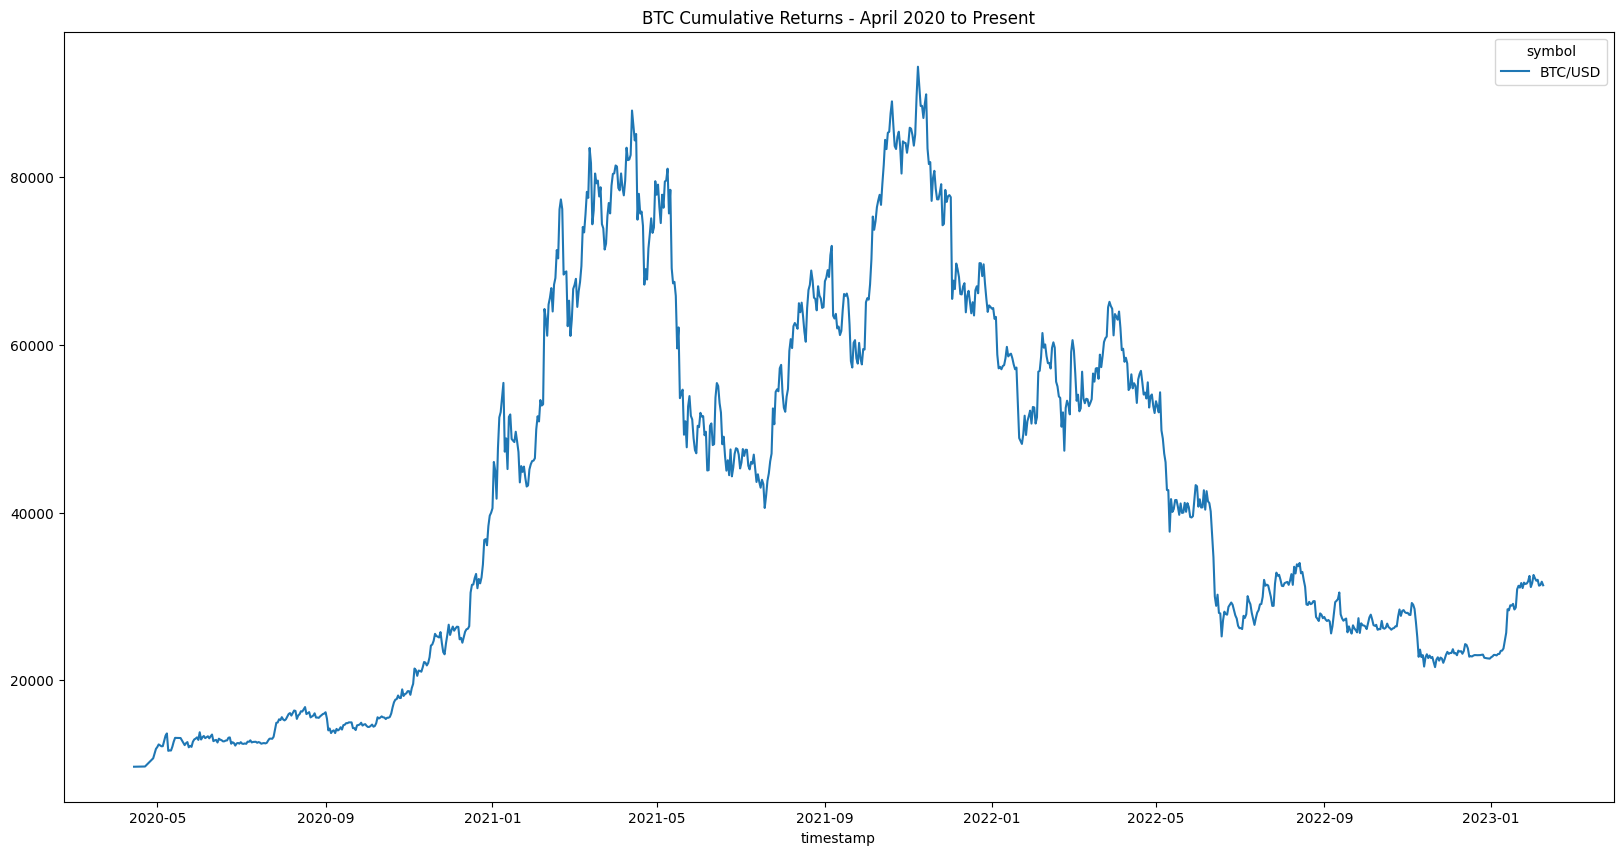

In [52]:
# Plot performance and save to Images
import matplotlib.pyplot as plt
btc_profit.plot(figsize=(20,10), legend=True, title="BTC Cumulative Returns - April 2020 to Present");
plt.savefig("Images/BTCCumulativeReturns.png")

In [53]:
# Running cumulative return against initial investment to obtain current market value of investment in SPY
spy_profit = initial_investment * SPY_cumprod
spy_annotation = spy_profit.iloc[-1][0].round().astype(int)
spy_profit

symbol,SPY
timestamp,
2020-04-09,10154.014599
2020-04-13,10059.489051
2020-04-14,10357.664234
2020-04-15,10136.861314
2020-04-16,10181.021898
...,...
2023-02-02,15210.948905
2023-02-03,15049.270073
2023-02-06,14957.299270


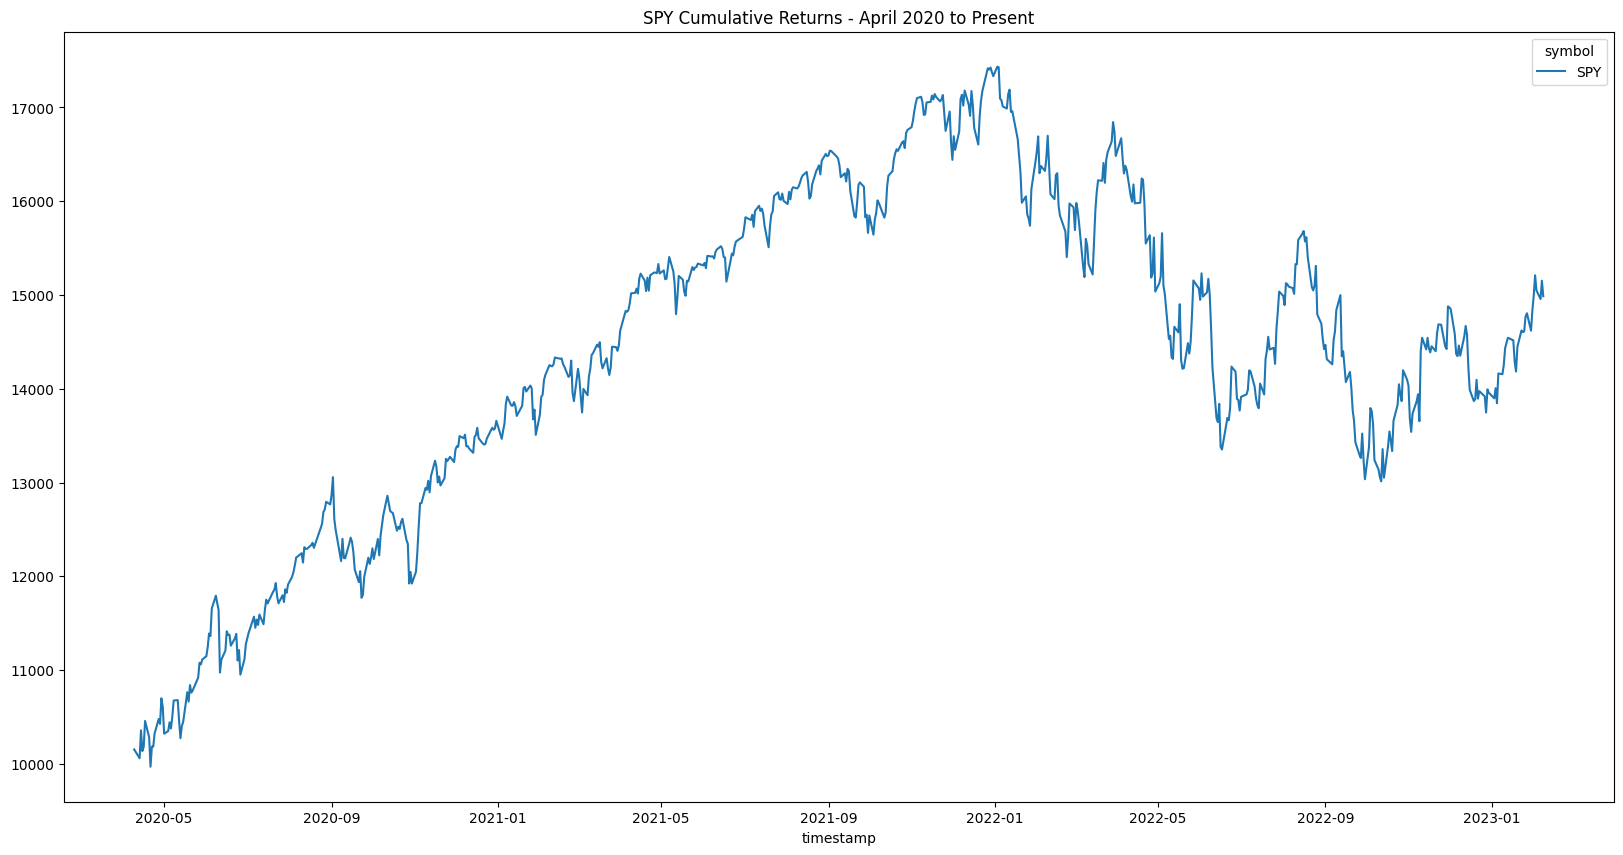

In [54]:
# Plot performance and save to Images
spy_profit.plot(figsize=(20,10), legend=True, title="SPY Cumulative Returns - April 2020 to Present");
plt.savefig("Images/SPYCumulativeReturns.png")

In [55]:
# Running cumulative return against initial investment to obtain current market value of investment in GLD
gld_profit = initial_investment * GLD_cumprod
gld_annotation = gld_profit.iloc[-1][0].round().astype(int)
gld_profit

symbol,GLD
timestamp,
2020-04-09,10254.122211
2020-04-13,10437.116069
2020-04-14,10517.943744
2020-04-15,10475.266731
2020-04-16,10456.514711
...,...
2023-02-02,11503.394762
2023-02-03,11216.294859
2023-02-06,11239.573230


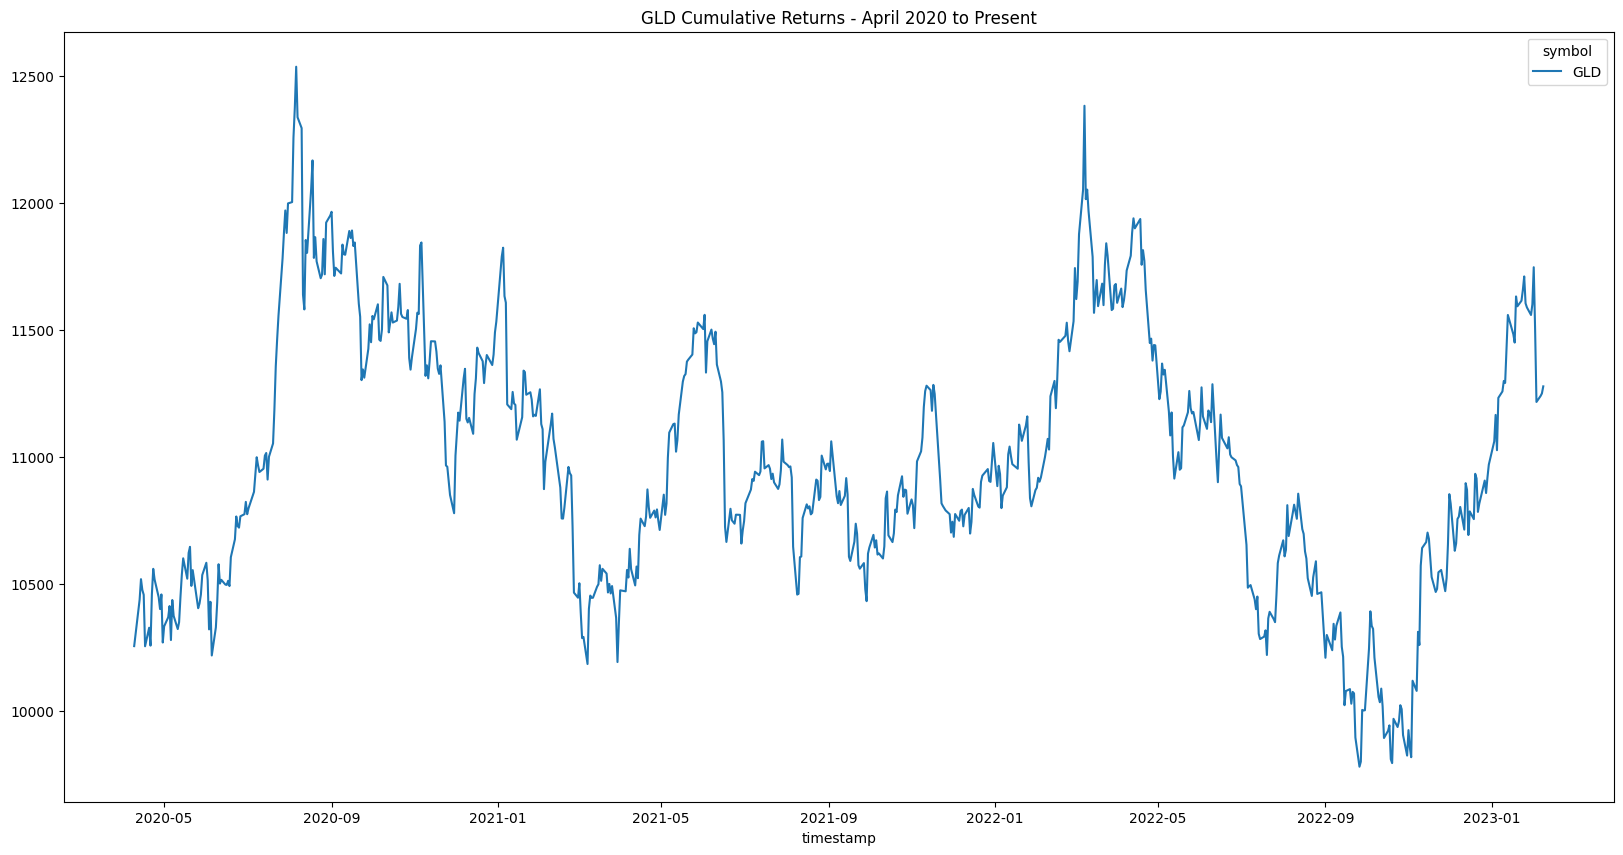

In [56]:
# Plot performance and save to Images
gld_profit.plot(figsize=(20,10), legend=True, title="GLD Cumulative Returns - April 2020 to Present");
plt.savefig("Images/GLDCumulativeReturns.png")

In [57]:
# Running cumulative return against initial investment to obtain current market value of investment in TLT
tlt_profit = initial_investment * TLT_cumprod
tlt_annotation = tlt_profit.iloc[-1][0].round().astype(int)
tlt_profit

symbol,TLT
timestamp,
2020-04-09,10018.171906
2020-04-13,9926.706645
2020-04-14,9924.283724
2020-04-15,10187.170634
2020-04-16,10302.865104
...,...
2023-02-02,6561.269611
2023-02-03,6463.141317
2023-02-06,6415.288630


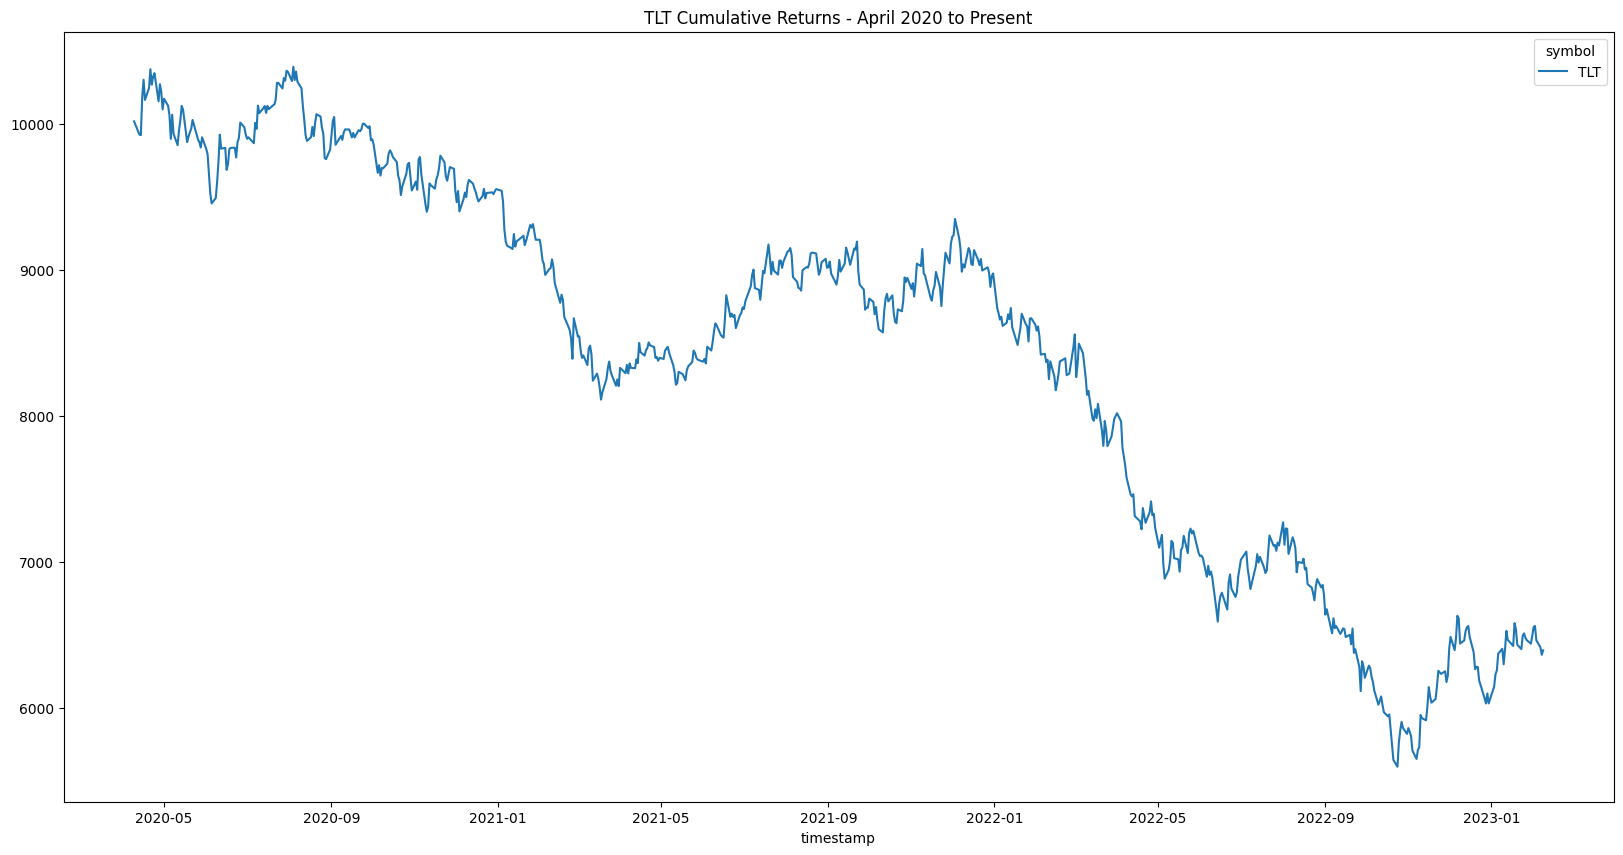

In [58]:
# Plot performance and save to Images
tlt_profit.plot(figsize=(20,10), legend=True, title="TLT Cumulative Returns - April 2020 to Present");
plt.savefig("Images/TLTCumulativeReturns.png")

In [59]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim = (date.today()+timedelta(days=50)).isoformat()

days_after_stocks = (date.today()+timedelta(days=2)).isoformat()

days_after_btc = (date.today()+timedelta(days=1)).isoformat()

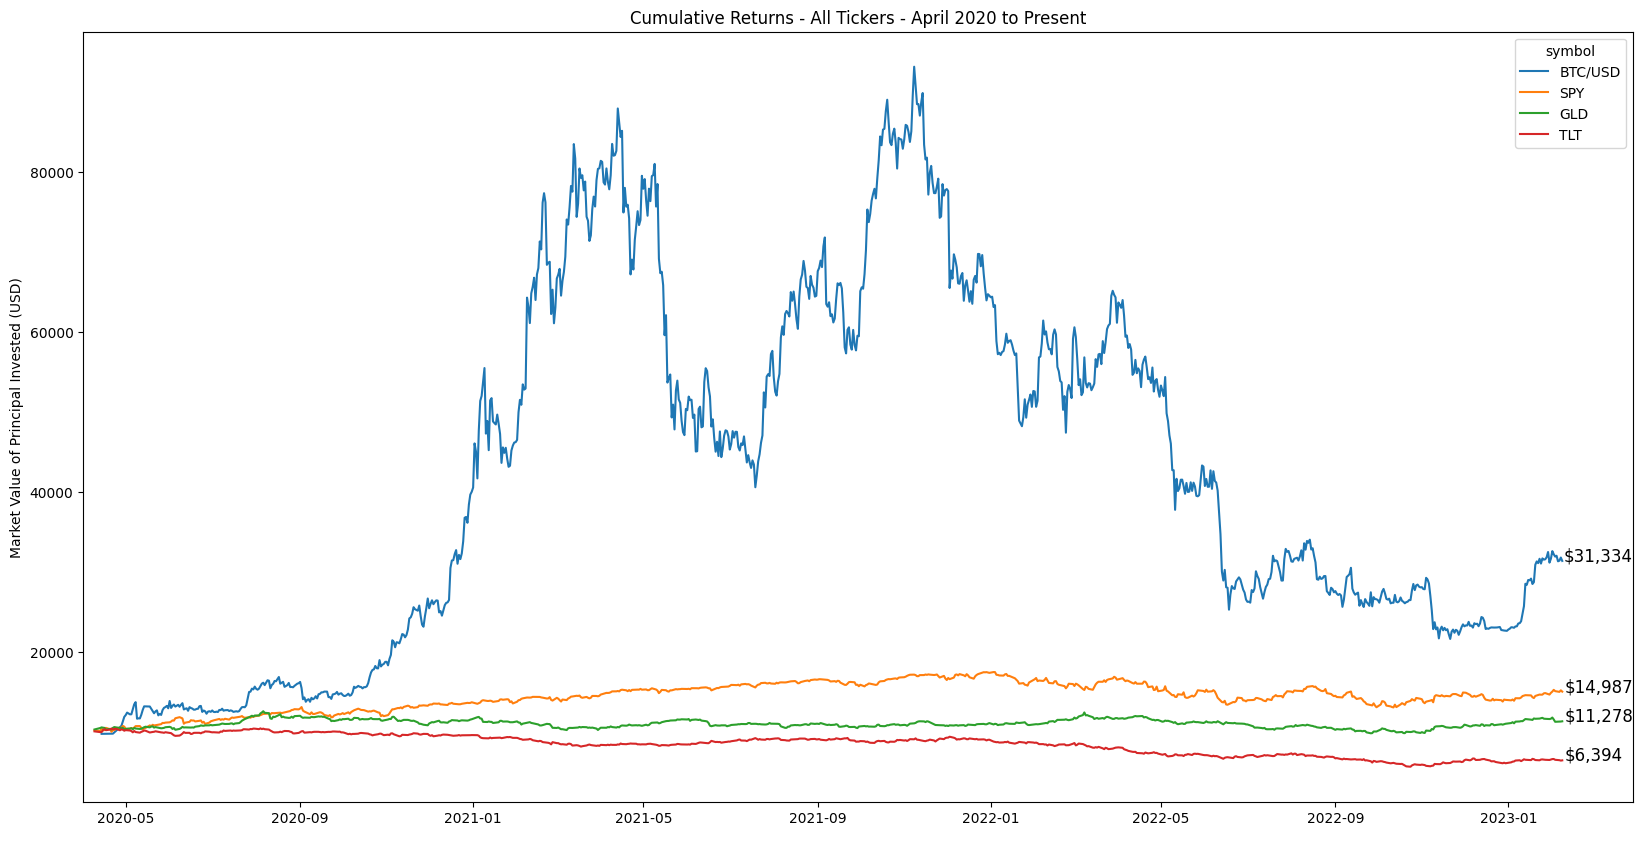

In [60]:
# Overlay of cumulative performances
ax = btc_profit.plot(figsize=(20,10), legend=True, title="Cumulative Returns - All Tickers - April 2020 to Present")
spy_profit.plot(ax=ax, legend=True)
gld_profit.plot(ax=ax, legend=True)
tlt_profit.plot(ax=ax, legend=True)
ax.text(days_after_stocks, tlt_annotation, f"${tlt_annotation:,}", size=12)
ax.text(days_after_stocks, gld_annotation, f"${gld_annotation:,}", size=12)
ax.text(days_after_stocks, spy_annotation, f"${spy_annotation:,}", size=12)
ax.text(days_after_btc, btc_annotation, f"${btc_annotation:,}", size=12)
ax.set(ylabel='Market Value of Principal Invested (USD)',
       xlabel=' ')
ax.set_xlim('2020-04', days_after_xlim)
plt.savefig("Images/OverlayCumulativeReturns.png");

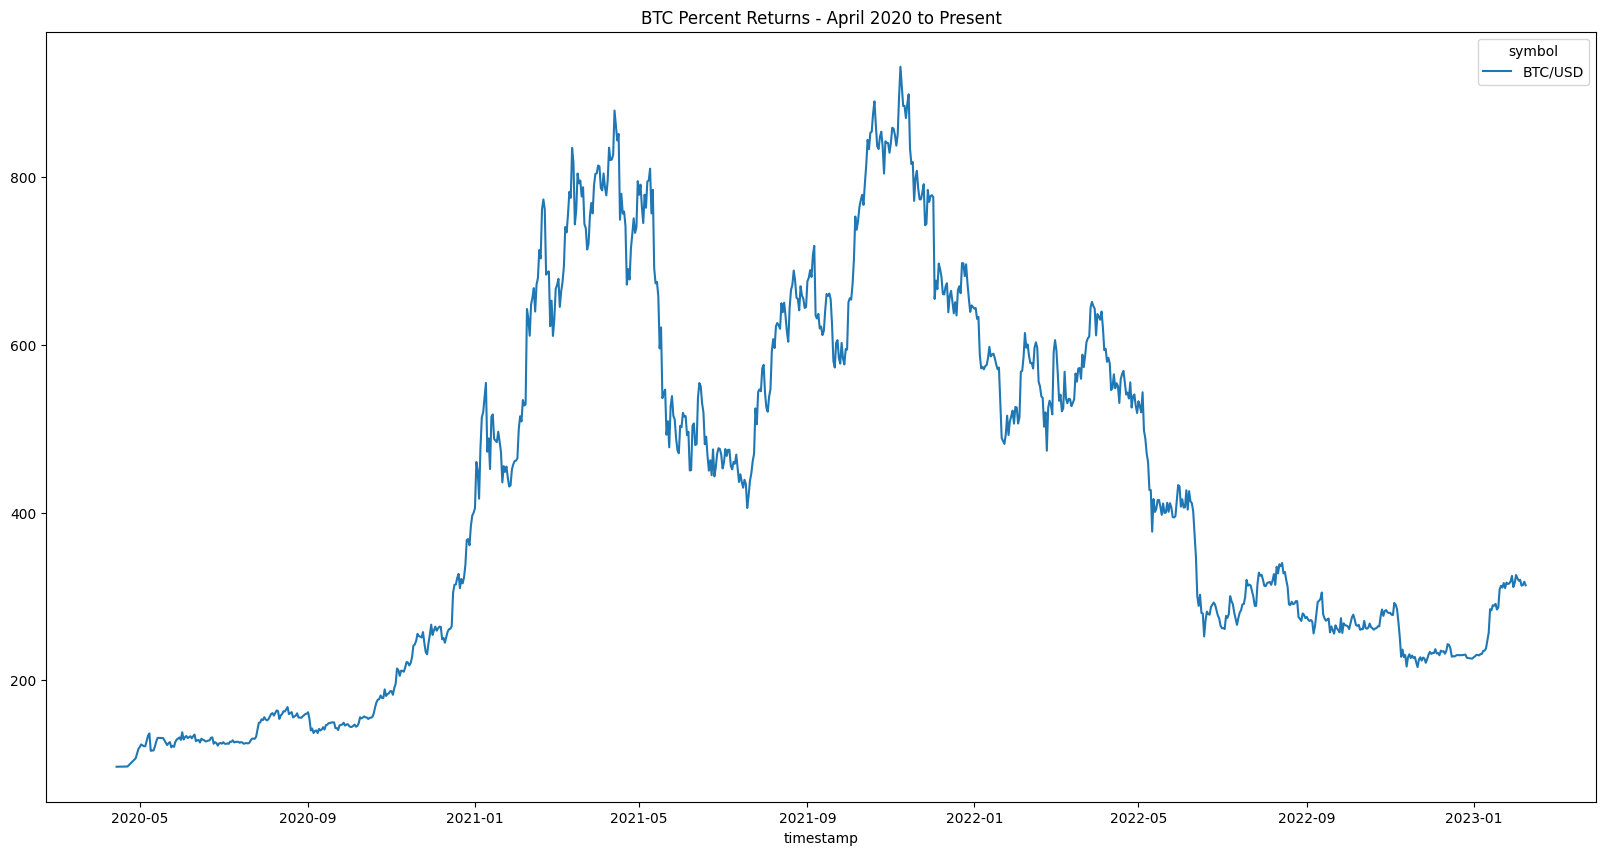

In [61]:
# Plot performance in percentage terms and save to Images
(BTC_cumprod*100).plot(figsize=(20,10), legend=True, title="BTC Percent Returns - April 2020 to Present");
plt.savefig("Images/BTCPercentReturns.png")

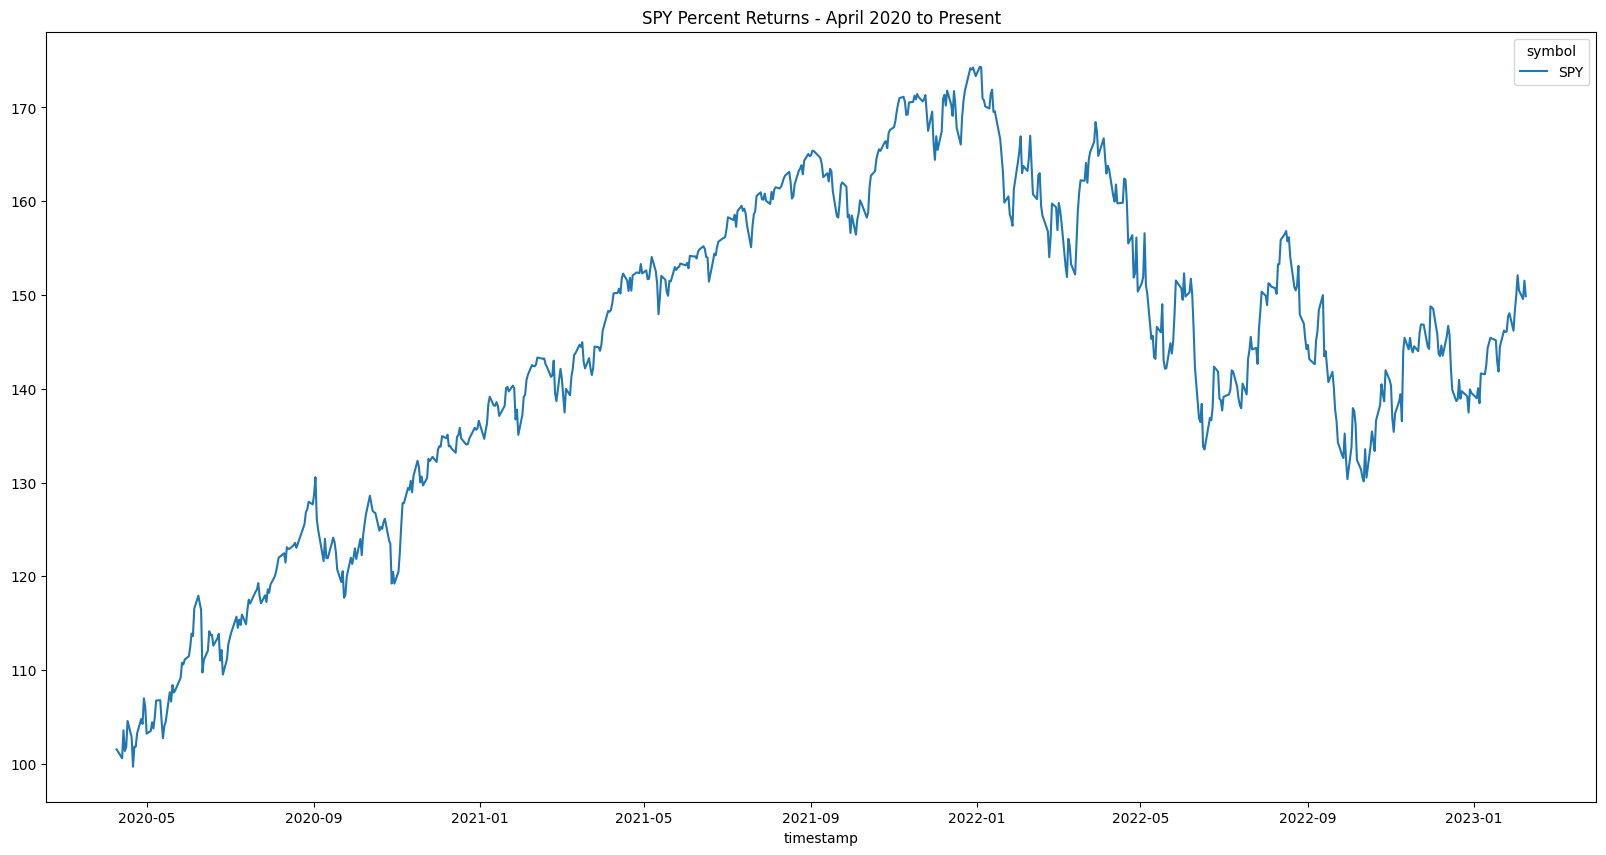

In [62]:
# Plot performance in percentage terms and save to Images
(SPY_cumprod*100).plot(figsize=(20,10), legend=True, title="SPY Percent Returns - April 2020 to Present");
plt.savefig("Images/SPYPercentReturns.png")

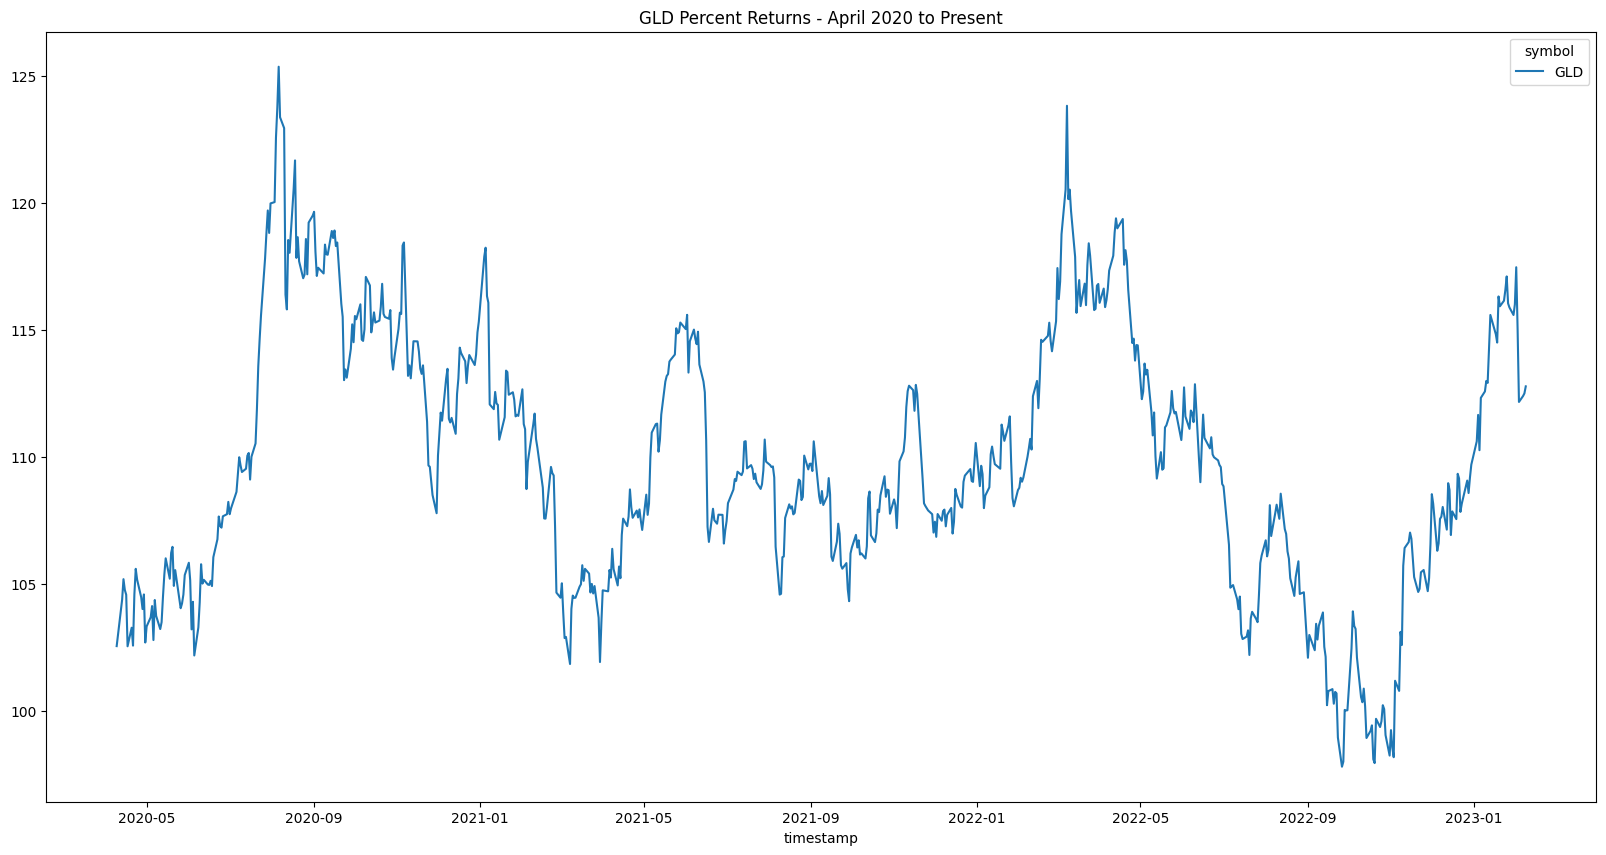

In [63]:
# Plot performance in percentage terms and save to Images
(GLD_cumprod*100).plot(figsize=(20,10), legend=True, title="GLD Percent Returns - April 2020 to Present");
plt.savefig("Images/GLDPercentReturns.png")

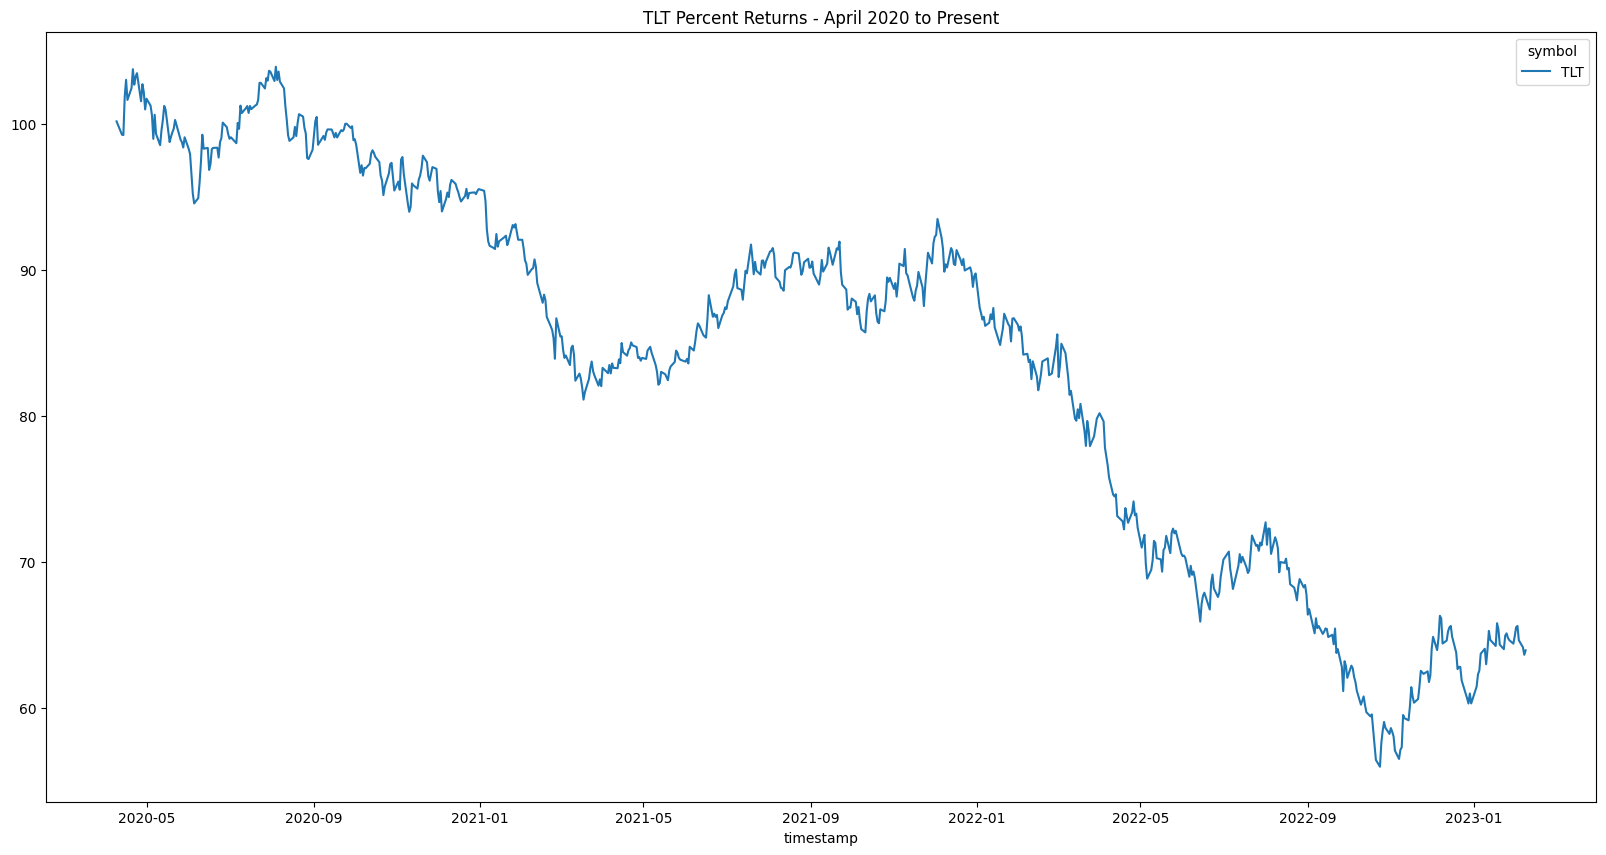

In [64]:
# Plot performance in percentage terms and save to Images
(TLT_cumprod*100).plot(figsize=(20,10), legend=True, title="TLT Percent Returns - April 2020 to Present");
plt.savefig("Images/TLTPercentReturns.png")

In [65]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim_pct = (date.today()+timedelta(days=40)).isoformat()

days_after_stocks_pct = (date.today()+timedelta(days=4)).isoformat()

days_after_btc_pct = (date.today()+timedelta(days=2)).isoformat()

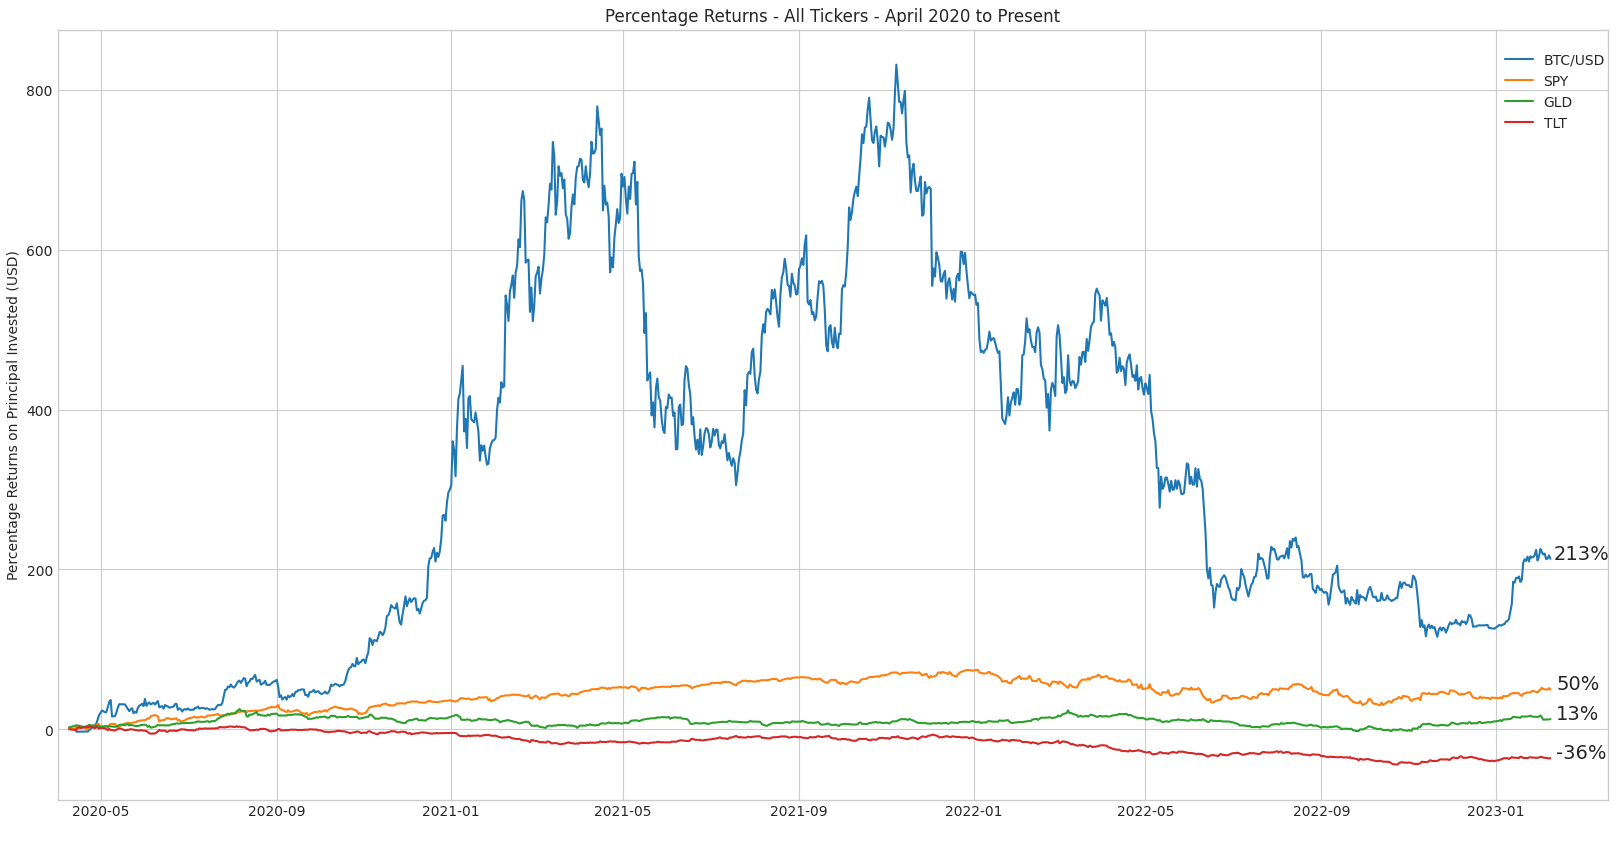

In [66]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = ((BTC_cumprod*100)-100).plot(figsize=(20,10), legend=True, title="Percentage Returns - All Tickers - April 2020 to Present")
    ((SPY_cumprod*100)-100).plot(ax=ax, legend=True)
    ((GLD_cumprod*100)-100).plot(ax=ax, legend=True)
    ((TLT_cumprod*100)-100).plot(ax=ax, legend=True)
    ax.text(days_after_stocks_pct, TLT_prod_annotation-100, f"{TLT_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, GLD_prod_annotation-100, f"{GLD_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, SPY_prod_annotation-100, f"{SPY_prod_annotation-100}%", size=14)
    ax.text(days_after_btc_pct, BTC_prod_annotation-100, f"{BTC_prod_annotation-100}%", size=14)
    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
    ax.set_xlim('2020-04', days_after_xlim_pct)
    plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayPercentageReturns.png");

In [67]:
# Rechecking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1007 non-null   object 
 1   timestamp    1007 non-null   object 
 2   open         1007 non-null   float64
 3   high         1007 non-null   float64
 4   low          1007 non-null   float64
 5   close        1007 non-null   float64
 6   volume       1007 non-null   float64
 7   trade_count  1007 non-null   float64
 8   vwap         1007 non-null   float64
dtypes: float64(7), object(2)
memory usage: 70.9+ KB


In [68]:
# Shifting timestamp back to datetime to filter on month start dates
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       1007 non-null   object        
 1   timestamp    1007 non-null   datetime64[ns]
 2   open         1007 non-null   float64       
 3   high         1007 non-null   float64       
 4   low          1007 non-null   float64       
 5   close        1007 non-null   float64       
 6   volume       1007 non-null   float64       
 7   trade_count  1007 non-null   float64       
 8   vwap         1007 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 70.9+ KB


In [69]:
# Filtering for month start dates
btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
btc_monthly

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
5,BTC/USD,2020-05-01,8826.50,8834.00,8716.00,8816.50,0.300700,4.0,8830.673595
29,BTC/USD,2020-06-01,9568.50,10393.00,9515.00,10106.50,5.950700,34.0,9979.759012
59,BTC/USD,2020-07-01,9129.50,9270.00,9129.50,9240.50,5.467900,59.0,9230.826688
90,BTC/USD,2020-08-01,11619.50,12035.00,10594.50,11221.50,0.667400,24.0,11656.094171
116,BTC/USD,2020-09-01,11805.50,12005.50,11805.50,11847.50,0.404900,9.0,11947.180168
146,BTC/USD,2020-10-01,10821.00,10913.00,10477.00,10654.50,5.505900,50.0,10671.754182
177,BTC/USD,2020-11-01,13721.00,13842.50,13688.00,13688.00,1.499100,18.0,13756.809853
207,BTC/USD,2020-12-01,19469.50,19916.00,18222.00,18586.50,32.057500,404.0,19078.142224
238,BTC/USD,2021-01-01,29225.00,29631.00,28750.00,29631.00,25.076500,211.0,29330.826766
269,BTC/USD,2021-02-01,33787.00,34697.00,33145.00,33992.00,815.611700,2005.0,33830.680191


In [70]:
# Grabbing subset of timestamp and closing prices 
btc_subset = btc_monthly[['timestamp', 'close']]
btc_subset

,timestamp,close
5,2020-05-01,8816.50
29,2020-06-01,10106.50
59,2020-07-01,9240.50
90,2020-08-01,11221.50
116,2020-09-01,11847.50
146,2020-10-01,10654.50
177,2020-11-01,13688.00
207,2020-12-01,18586.50
238,2021-01-01,29631.00
269,2021-02-01,33992.00


In [71]:
# Resetting index
btc_reset = btc_subset.reset_index(drop=True)
btc_reset

,timestamp,close
0,2020-05-01,8816.50
1,2020-06-01,10106.50
2,2020-07-01,9240.50
3,2020-08-01,11221.50
4,2020-09-01,11847.50
5,2020-10-01,10654.50
6,2020-11-01,13688.00
7,2020-12-01,18586.50
8,2021-01-01,29631.00
9,2021-02-01,33992.00


In [72]:
# Setting timestamp column to index to prep for pct_change
btc_index = btc_reset.set_index('timestamp')
btc_index

,close
timestamp,
2020-05-01,8816.50
2020-06-01,10106.50
2020-07-01,9240.50
2020-08-01,11221.50
2020-09-01,11847.50
2020-10-01,10654.50
2020-11-01,13688.00
2020-12-01,18586.50
2021-01-01,29631.00


In [73]:
# Calculating month over month pct change
btc_chg = btc_index.pct_change()
btc_chg

,close
timestamp,
2020-05-01,NaN
2020-06-01,0.146317
2020-07-01,-0.085687
2020-08-01,0.214382
2020-09-01,0.055786
2020-10-01,-0.100696
2020-11-01,0.284715
2020-12-01,0.357868
2021-01-01,0.594222


In [74]:
# Rechecking info
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2020-05-01 to 2023-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   33 non-null     float64
dtypes: float64(1)
memory usage: 544.0 bytes


In [75]:
# Convert index back to string to prep for plotting
btc_chg.index = btc_chg.index.strftime("%Y-%m-%d")
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 2020-05-01 to 2023-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   33 non-null     float64
dtypes: float64(1)
memory usage: 544.0+ bytes


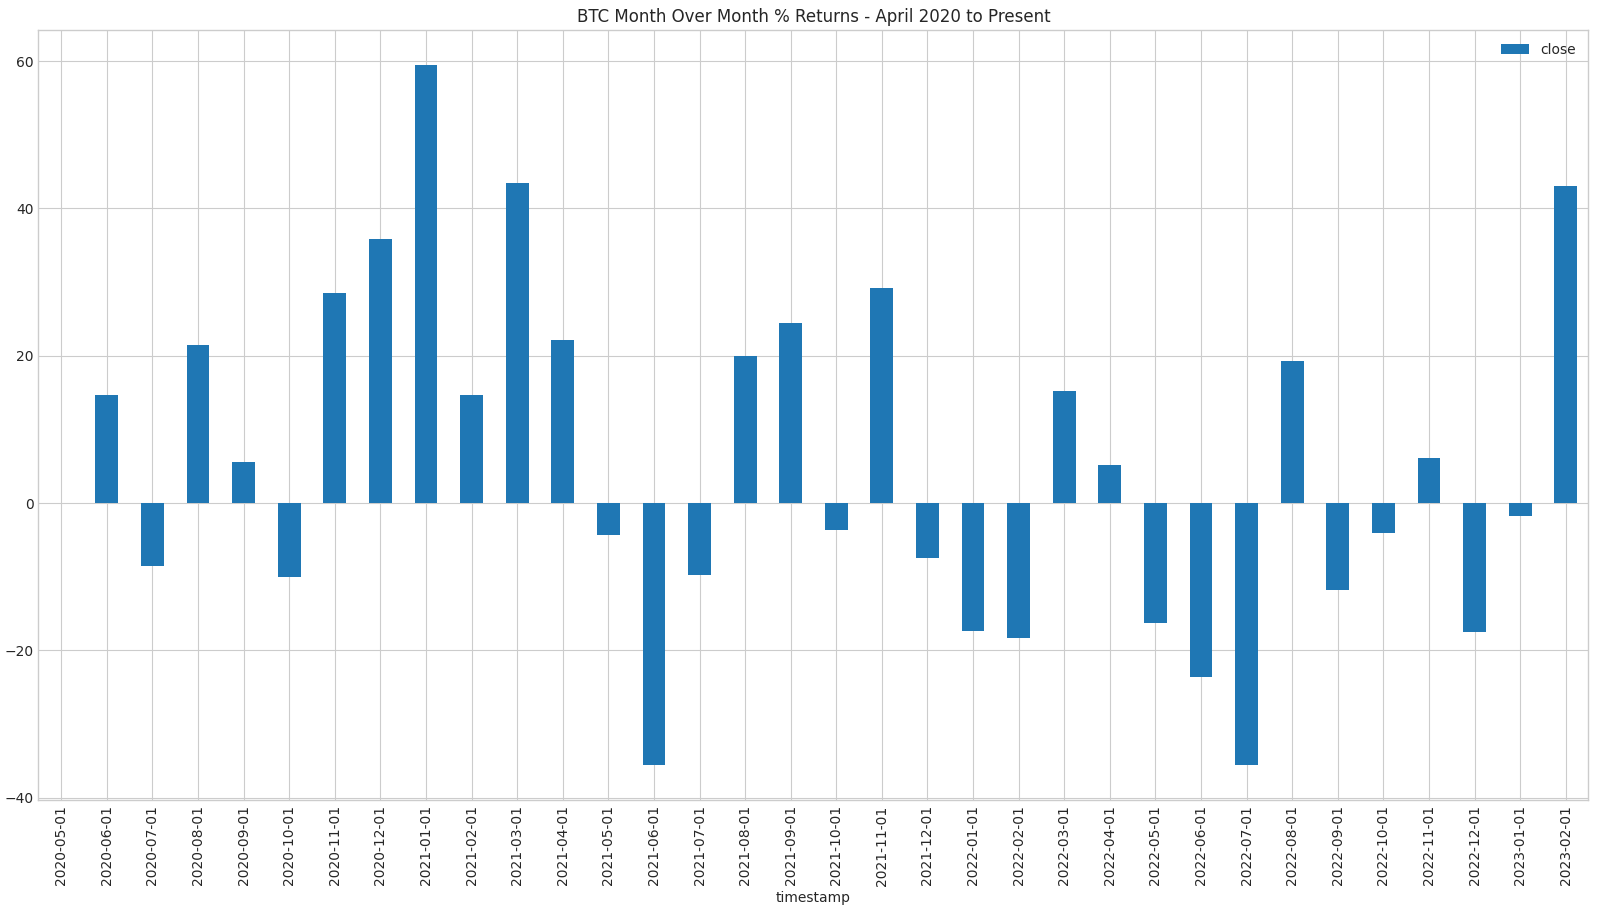

In [76]:
# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_chg*100).plot(kind='bar', figsize=(20,10), legend=True, title="BTC Month Over Month % Returns - April 2020 to Present");
    plt.savefig("Images/BTCMonthlyPercentReturns.png")

In [77]:
# Prep SPY dataframe
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       2145 non-null   object 
 1   timestamp    2145 non-null   object 
 2   open         2145 non-null   float64
 3   high         2145 non-null   float64
 4   low          2145 non-null   float64
 5   close        2145 non-null   float64
 6   volume       2145 non-null   float64
 7   trade_count  2145 non-null   float64
 8   vwap         2145 non-null   float64
dtypes: float64(7), object(2)
memory usage: 150.9+ KB


In [78]:
# Shifting timestamp back to datetime to filter on month start dates
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       2145 non-null   object        
 1   timestamp    2145 non-null   datetime64[ns]
 2   open         2145 non-null   float64       
 3   high         2145 non-null   float64       
 4   low          2145 non-null   float64       
 5   close        2145 non-null   float64       
 6   volume       2145 non-null   float64       
 7   trade_count  2145 non-null   float64       
 8   vwap         2145 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 150.9+ KB


In [79]:
stock_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
0,GLD,2020-04-08,155.91,155.940,154.5900,154.65,7600804.0,60704.0,155.233884
1,GLD,2020-04-09,158.08,159.080,157.2100,158.58,18123039.0,140239.0,158.255634
2,GLD,2020-04-13,159.17,162.380,158.6250,161.41,20549213.0,140401.0,160.906373
3,GLD,2020-04-14,162.73,164.420,161.7800,162.66,17095086.0,146336.0,163.197557
4,GLD,2020-04-15,161.80,162.540,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...,...
2140,TLT,2023-02-02,108.92,109.352,108.0850,108.32,19618843.0,133699.0,108.592748
2141,TLT,2023-02-03,106.77,107.110,106.0800,106.70,20619484.0,114736.0,106.727918
2142,TLT,2023-02-06,105.75,106.305,105.6800,105.91,15185832.0,83202.0,105.931861
2143,TLT,2023-02-07,105.33,106.230,105.0000,105.06,18290306.0,107708.0,105.469238


In [80]:
stock_index = stock_df.set_index('timestamp')
stock_index

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-04-08,GLD,155.91,155.940,154.5900,154.65,7600804.0,60704.0,155.233884
2020-04-09,GLD,158.08,159.080,157.2100,158.58,18123039.0,140239.0,158.255634
2020-04-13,GLD,159.17,162.380,158.6250,161.41,20549213.0,140401.0,160.906373
2020-04-14,GLD,162.73,164.420,161.7800,162.66,17095086.0,146336.0,163.197557
2020-04-15,GLD,161.80,162.540,160.8061,162.00,12141890.0,95518.0,161.749049
...,...,...,...,...,...,...,...,...
2023-02-02,TLT,108.92,109.352,108.0850,108.32,19618843.0,133699.0,108.592748
2023-02-03,TLT,106.77,107.110,106.0800,106.70,20619484.0,114736.0,106.727918
2023-02-06,TLT,105.75,106.305,105.6800,105.91,15185832.0,83202.0,105.931861


In [81]:
stock_index['2021-06-30':'2021-07-02']

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2021-06-30,GLD,164.57,166.100,164.2900,165.63,7954916.0,55215.0,165.379047
2021-07-01,GLD,166.65,166.880,165.5000,166.20,7427387.0,50788.0,166.141960
2021-07-02,GLD,167.35,167.715,166.4000,167.29,7872766.0,52311.0,167.181069
2021-06-30,SPY,427.21,428.780,427.1800,428.06,64702769.0,315392.0,428.035998
2021-07-01,SPY,428.87,430.600,428.8000,430.43,52968992.0,315119.0,429.721484
2021-07-02,SPY,431.67,434.100,430.5218,433.72,57503965.0,312260.0,432.842859
2021-06-30,TLT,144.25,144.930,144.0700,144.35,15707427.0,76777.0,144.486788
2021-07-01,TLT,143.98,144.310,143.5300,144.17,10767196.0,55429.0,143.845345
2021-07-02,TLT,144.23,145.040,144.1100,145.04,9648629.0,52006.0,144.737576


In [82]:
# Grouping GLD by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
gld_group_df

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-04-01,GLD,155.9100,155.9400,154.5900,154.65,7600804.0,60704.0,155.233884
2020-05-01,GLD,157.9500,160.4500,157.8000,159.78,10914334.0,87024.0,159.380639
2020-06-01,GLD,162.9235,163.7400,162.3900,163.66,8155048.0,60202.0,163.323352
2020-07-01,GLD,167.0500,167.0600,165.3400,166.62,13214759.0,86821.0,166.229189
2020-08-03,GLD,185.0500,185.8200,184.2000,185.64,12896999.0,93696.0,185.228945
2020-09-01,GLD,186.9900,186.9900,184.3300,185.05,10689058.0,75982.0,185.384520
2020-10-01,GLD,178.7100,179.5000,178.0375,178.70,10380333.0,65577.0,178.903733
2020-11-02,GLD,177.4499,177.9250,177.1301,177.91,6498368.0,55161.0,177.626697
2020-12-01,GLD,169.7600,170.4800,169.3000,170.19,13555209.0,87946.0,169.921532


In [83]:
# Filtering first and last months due to incomplete data
gld_iloc = gld_group_df.iloc[1:-1]
gld_iloc

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-05-01,GLD,157.9500,160.4500,157.8000,159.78,10914334.0,87024.0,159.380639
2020-06-01,GLD,162.9235,163.7400,162.3900,163.66,8155048.0,60202.0,163.323352
2020-07-01,GLD,167.0500,167.0600,165.3400,166.62,13214759.0,86821.0,166.229189
2020-08-03,GLD,185.0500,185.8200,184.2000,185.64,12896999.0,93696.0,185.228945
2020-09-01,GLD,186.9900,186.9900,184.3300,185.05,10689058.0,75982.0,185.384520
2020-10-01,GLD,178.7100,179.5000,178.0375,178.70,10380333.0,65577.0,178.903733
2020-11-02,GLD,177.4499,177.9250,177.1301,177.91,6498368.0,55161.0,177.626697
2020-12-01,GLD,169.7600,170.4800,169.3000,170.19,13555209.0,87946.0,169.921532
2021-01-01,GLD,181.9700,182.4000,180.9550,182.32,14308436.0,102693.0,181.929522


In [84]:
# Grouping SPY by business month start; nth isolates by symbol
spy_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(1)
spy_group_df

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-04-01,SPY,267.960,276.0000,265.2542,274.00,153774487.0,950859.0,271.051454
2020-05-01,SPY,285.310,290.6572,281.5200,282.83,125180028.0,639987.0,284.092832
2020-06-01,SPY,303.620,306.2050,303.0600,305.45,56679836.0,316834.0,305.036356
2020-07-01,SPY,309.540,311.8900,309.0700,310.57,72474858.0,418495.0,310.486119
2020-08-03,SPY,328.320,329.6200,327.7300,328.67,53078112.0,288003.0,328.658795
2020-09-01,SPY,350.210,352.7100,349.2400,352.68,54999325.0,295183.0,351.086724
2020-10-01,SPY,337.690,338.7400,335.0100,336.97,88698745.0,442959.0,336.463100
2020-11-02,SPY,330.200,332.3600,327.2400,330.19,86068377.0,582406.0,329.604551
2020-12-01,SPY,365.570,367.6800,364.9300,365.84,74504970.0,378050.0,365.968334


In [85]:
# Filtering first and last months due to incomplete data
spy_iloc = spy_group_df.iloc[1:-1]
spy_iloc

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-05-01,SPY,285.31,290.6572,281.5200,282.83,125180028.0,639987.0,284.092832
2020-06-01,SPY,303.62,306.2050,303.0600,305.45,56679836.0,316834.0,305.036356
2020-07-01,SPY,309.54,311.8900,309.0700,310.57,72474858.0,418495.0,310.486119
2020-08-03,SPY,328.32,329.6200,327.7300,328.67,53078112.0,288003.0,328.658795
2020-09-01,SPY,350.21,352.7100,349.2400,352.68,54999325.0,295183.0,351.086724
2020-10-01,SPY,337.69,338.7400,335.0100,336.97,88698745.0,442959.0,336.463100
2020-11-02,SPY,330.20,332.3600,327.2400,330.19,86068377.0,582406.0,329.604551
2020-12-01,SPY,365.57,367.6800,364.9300,365.84,74504970.0,378050.0,365.968334
2021-01-01,SPY,375.31,375.4500,364.8200,368.97,110210840.0,623063.0,369.337439


In [86]:
# Grouping TLT by business month start; nth isolates by symbol
tlt_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(2)
tlt_group_df

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-04-01,TLT,165.110,166.1900,164.130,165.09,10147077.0,63686.0,165.217491
2020-05-01,TLT,167.500,168.1100,166.440,167.95,10209421.0,52918.0,167.362331
2020-06-01,TLT,162.100,162.4400,161.670,162.28,13353301.0,54793.0,162.363115
2020-07-01,TLT,162.810,163.5600,162.150,163.42,13181262.0,66576.0,163.014043
2020-08-03,TLT,169.240,169.9900,168.970,169.95,9067756.0,61181.0,169.514329
2020-09-01,TLT,161.760,164.0700,161.180,163.86,10587634.0,58232.0,163.138871
2020-10-01,TLT,162.510,163.7401,162.100,163.36,11523874.0,62953.0,163.194508
2020-11-02,TLT,158.700,159.1900,158.330,158.58,10810494.0,57471.0,158.700148
2020-12-01,TLT,158.550,158.7400,156.680,157.50,13666212.0,73359.0,157.524279


In [87]:
# Filtering first and last months due to incomplete data
tlt_iloc = tlt_group_df.iloc[1:-1]
tlt_iloc

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-05-01,TLT,167.500,168.1100,166.440,167.95,10209421.0,52918.0,167.362331
2020-06-01,TLT,162.100,162.4400,161.670,162.28,13353301.0,54793.0,162.363115
2020-07-01,TLT,162.810,163.5600,162.150,163.42,13181262.0,66576.0,163.014043
2020-08-03,TLT,169.240,169.9900,168.970,169.95,9067756.0,61181.0,169.514329
2020-09-01,TLT,161.760,164.0700,161.180,163.86,10587634.0,58232.0,163.138871
2020-10-01,TLT,162.510,163.7401,162.100,163.36,11523874.0,62953.0,163.194508
2020-11-02,TLT,158.700,159.1900,158.330,158.58,10810494.0,57471.0,158.700148
2020-12-01,TLT,158.550,158.7400,156.680,157.50,13666212.0,73359.0,157.524279
2021-01-01,TLT,156.670,158.1800,156.535,157.54,13152865.0,66776.0,157.536581


In [88]:
# Revising column names to prep for join
dict = {'close':'tlt_close'}

tlt_iloc = tlt_iloc.rename(columns=dict)


spy_dict = {'close':'spy_close'}

spy_iloc = spy_iloc.rename(columns=spy_dict)


gld_dict = {'close':'gld_close'}

gld_iloc = gld_iloc.rename(columns=gld_dict)
gld_iloc



,symbol,open,high,low,gld_close,volume,trade_count,vwap
timestamp,,,,,,,,
2020-05-01,GLD,157.9500,160.4500,157.8000,159.78,10914334.0,87024.0,159.380639
2020-06-01,GLD,162.9235,163.7400,162.3900,163.66,8155048.0,60202.0,163.323352
2020-07-01,GLD,167.0500,167.0600,165.3400,166.62,13214759.0,86821.0,166.229189
2020-08-03,GLD,185.0500,185.8200,184.2000,185.64,12896999.0,93696.0,185.228945
2020-09-01,GLD,186.9900,186.9900,184.3300,185.05,10689058.0,75982.0,185.384520
2020-10-01,GLD,178.7100,179.5000,178.0375,178.70,10380333.0,65577.0,178.903733
2020-11-02,GLD,177.4499,177.9250,177.1301,177.91,6498368.0,55161.0,177.626697
2020-12-01,GLD,169.7600,170.4800,169.3000,170.19,13555209.0,87946.0,169.921532
2021-01-01,GLD,181.9700,182.4000,180.9550,182.32,14308436.0,102693.0,181.929522


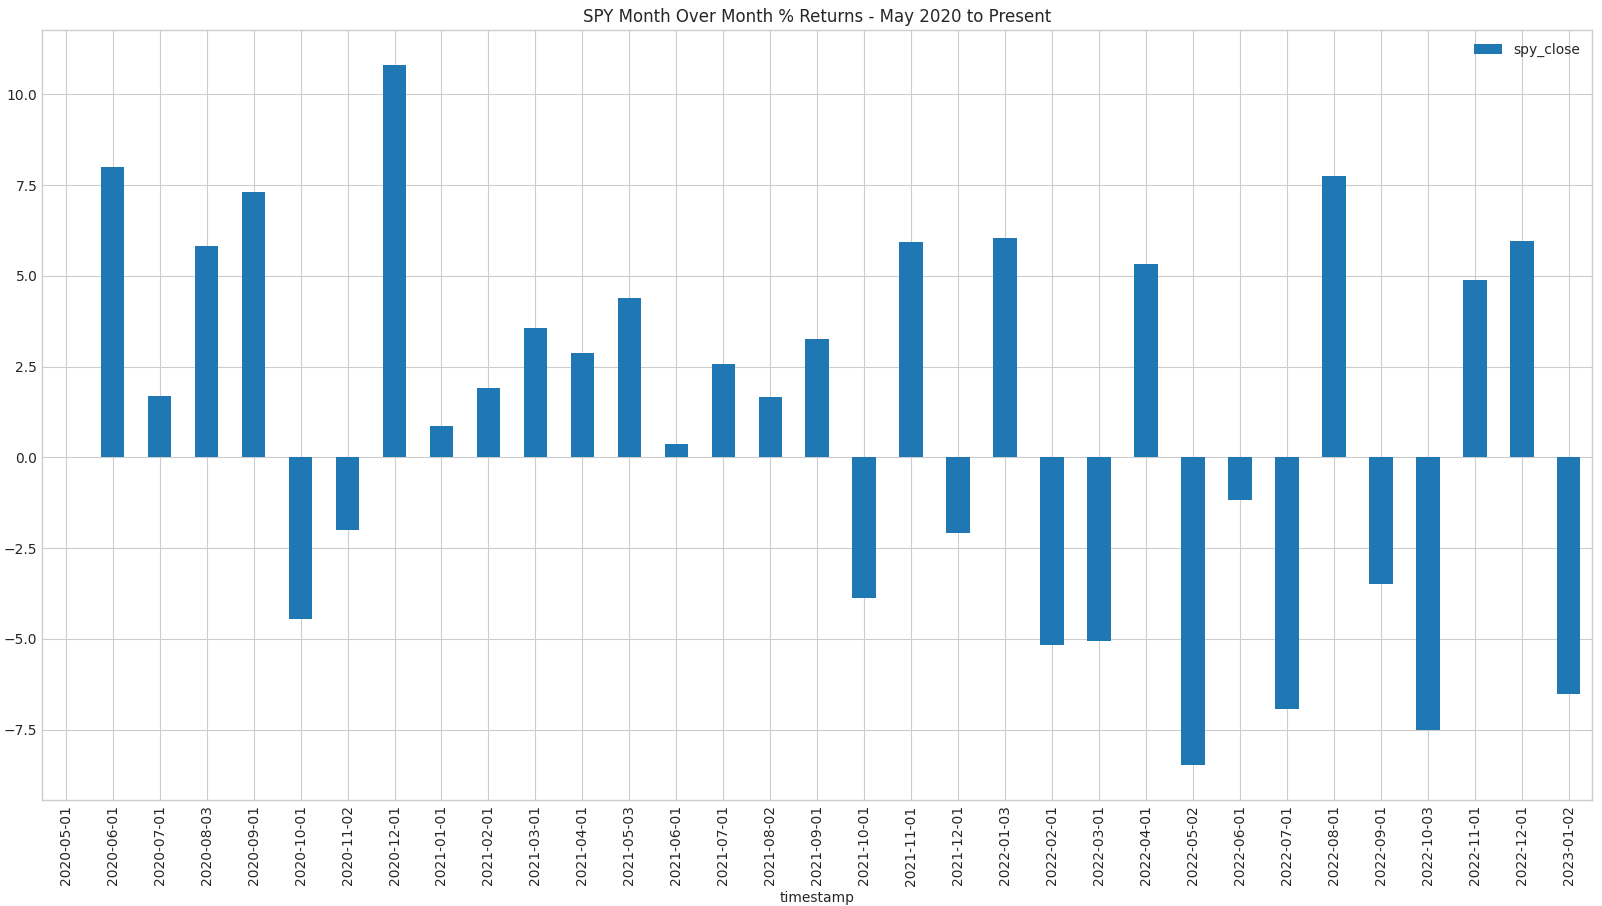

In [89]:
# Grabbing subset of SPY timestamp and closing prices 
spy_close = spy_iloc['spy_close']
spy_close

# Calculating pct change
spy_pct = spy_close.pct_change()

# Convert index back to string to prep for plotting
spy_pct.index = spy_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (spy_pct*100).plot(kind='bar', figsize=(20,10), legend=True, title="SPY Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/SPYMonthlyPercentReturns.png")

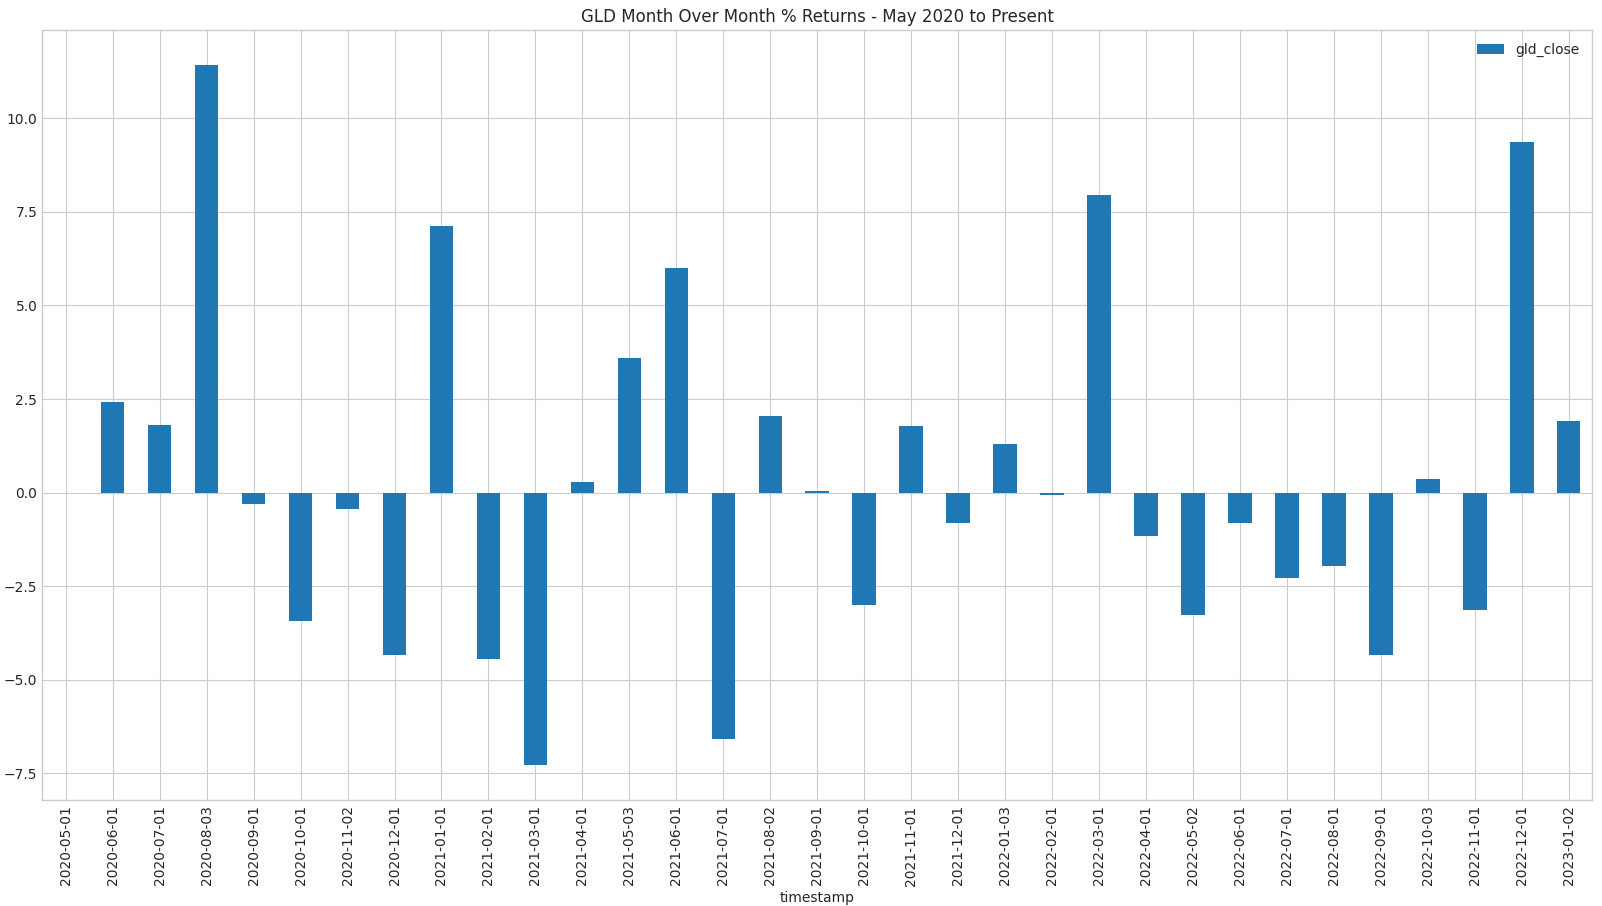

In [90]:
# Grabbing subset of GLD timestamp and closing prices 
gld_close = gld_iloc['gld_close']

# Calculating pct change
gld_pct = gld_close.pct_change()

# Convert index back to string to prep for plotting
gld_pct.index = gld_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (gld_pct*100).plot(kind='bar', figsize=(20,10), legend=True, title="GLD Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/GLDMonthlyPercentReturns.png")

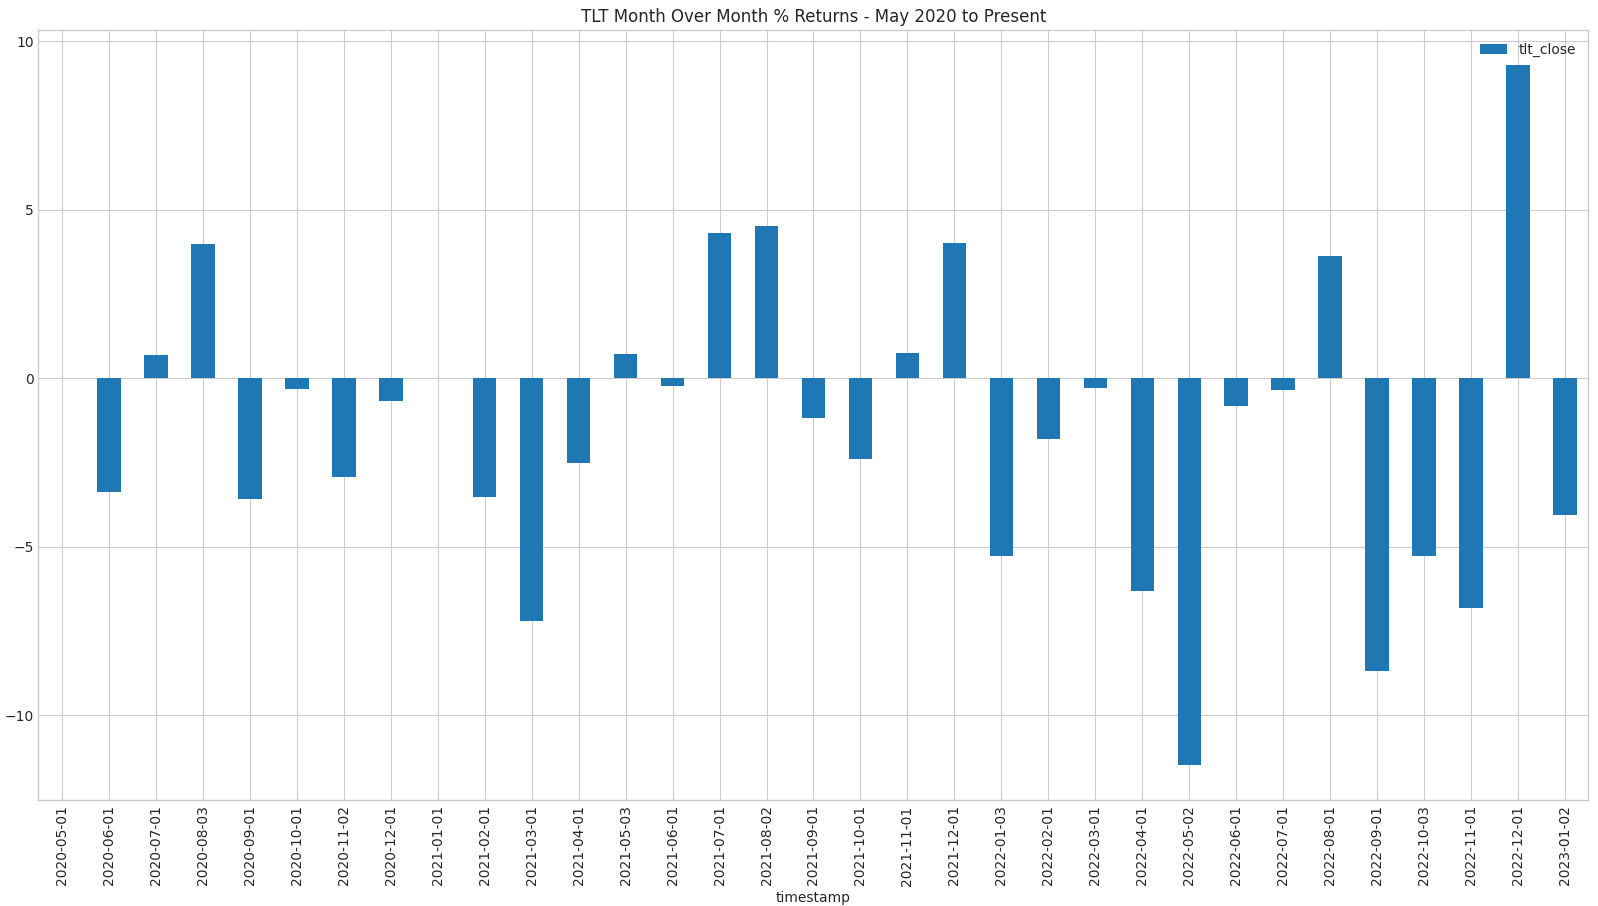

In [91]:
# Grabbing subset of TLT timestamp and closing prices 
tlt_close = tlt_iloc['tlt_close']

# Calculating pct change
tlt_pct = tlt_close.pct_change()

# Convert index back to string to prep for plotting
tlt_pct.index = tlt_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (tlt_pct*100).plot(kind='bar', figsize=(20,10), legend=True, title="TLT Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/TLTMonthlyPercentReturns.png")

In [92]:
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 2020-05-01 to 2023-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   33 non-null     float64
dtypes: float64(1)
memory usage: 544.0+ bytes


In [93]:
tlt_pct.info()

<class 'pandas.core.series.Series'>
Index: 33 entries, 2020-05-01 to 2023-01-02
Series name: tlt_close
Non-Null Count  Dtype  
--------------  -----  
32 non-null     float64
dtypes: float64(1)
memory usage: 528.0+ bytes


In [94]:
spy_pct.shape

(33,)

In [95]:
gld_pct.shape

(33,)

In [96]:
df_concat = pd.concat([tlt_pct, spy_pct, gld_pct], axis=1)
df_concat

,tlt_close,spy_close,gld_close
timestamp,,,
2020-05-01,NaN,NaN,NaN
2020-06-01,-0.033760,0.079977,0.024283
2020-07-01,0.007025,0.016762,0.018086
2020-08-03,0.039958,0.058280,0.114152
2020-09-01,-0.035834,0.073052,-0.003178
2020-10-01,-0.003051,-0.044545,-0.034315
2020-11-02,-0.029261,-0.020120,-0.004421
2020-12-01,-0.006810,0.107968,-0.043393
2021-01-01,0.000254,0.008556,0.071273


In [97]:
btc_chg.shape

(34, 1)

In [98]:
btc_re = btc_chg.iloc[0:-1]
btc_re

,close
timestamp,
2020-05-01,NaN
2020-06-01,0.146317
2020-07-01,-0.085687
2020-08-01,0.214382
2020-09-01,0.055786
2020-10-01,-0.100696
2020-11-01,0.284715
2020-12-01,0.357868
2021-01-01,0.594222


In [99]:
all_concat = pd.concat([df_concat, btc_re], axis=1)
all_concat

,tlt_close,spy_close,gld_close,close
timestamp,,,,
2020-05-01,NaN,NaN,NaN,NaN
2020-06-01,-0.033760,0.079977,0.024283,0.146317
2020-07-01,0.007025,0.016762,0.018086,-0.085687
2020-08-03,0.039958,0.058280,0.114152,NaN
2020-09-01,-0.035834,0.073052,-0.003178,0.055786
2020-10-01,-0.003051,-0.044545,-0.034315,-0.100696
2020-11-02,-0.029261,-0.020120,-0.004421,NaN
2020-12-01,-0.006810,0.107968,-0.043393,0.357868
2021-01-01,0.000254,0.008556,0.071273,0.594222


In [100]:
# !pip install scipy

The correlation between both factors is 0.17


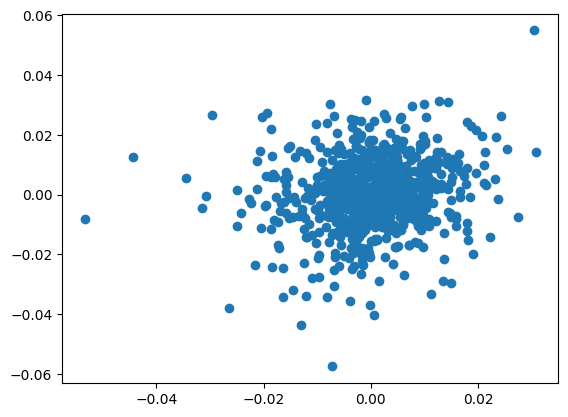

In [101]:
import scipy.stats as st
plt.scatter(gld_daily['GLD'], spy_daily['SPY'])
plt.show
correlation = st.pearsonr(gld_daily['GLD'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [102]:
correlation

PearsonRResult(statistic=0.17145939616379038, pvalue=4.0721678515028175e-06)

The correlation between both factors is -0.06


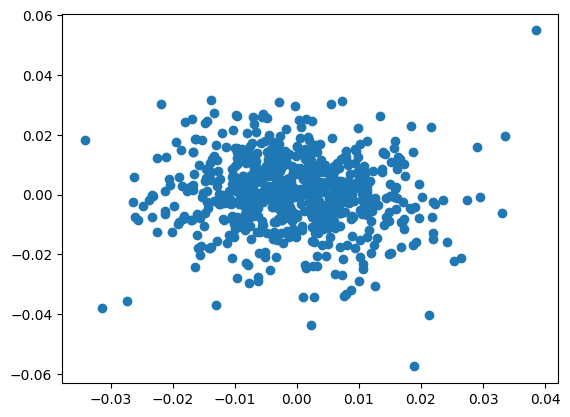

In [112]:
plt.scatter(tlt_daily['TLT'], spy_daily['SPY'])
plt.show
correlation_tlt = st.pearsonr(tlt_daily['TLT'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation_tlt[0],2)}")

In [113]:
correlation_tlt

PearsonRResult(statistic=-0.06365845393672241, pvalue=0.0891784588663232)

The correlation between both factors is 0.27


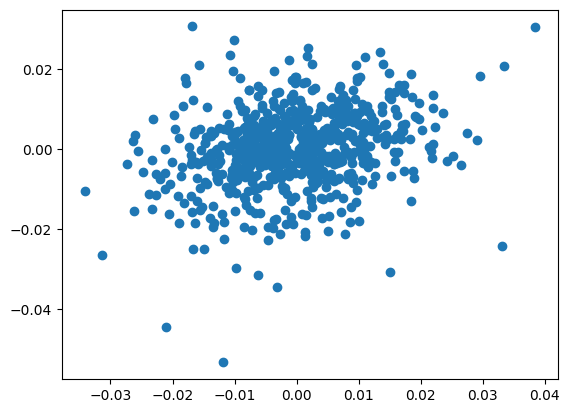

In [114]:
plt.scatter(tlt_daily['TLT'], gld_daily['GLD'])
plt.show
correlation_gld = st.pearsonr(tlt_daily['TLT'], gld_daily['GLD'])
print(f"The correlation between both factors is {round(correlation_gld[0],2)}")

In [ ]:
correlation_gld


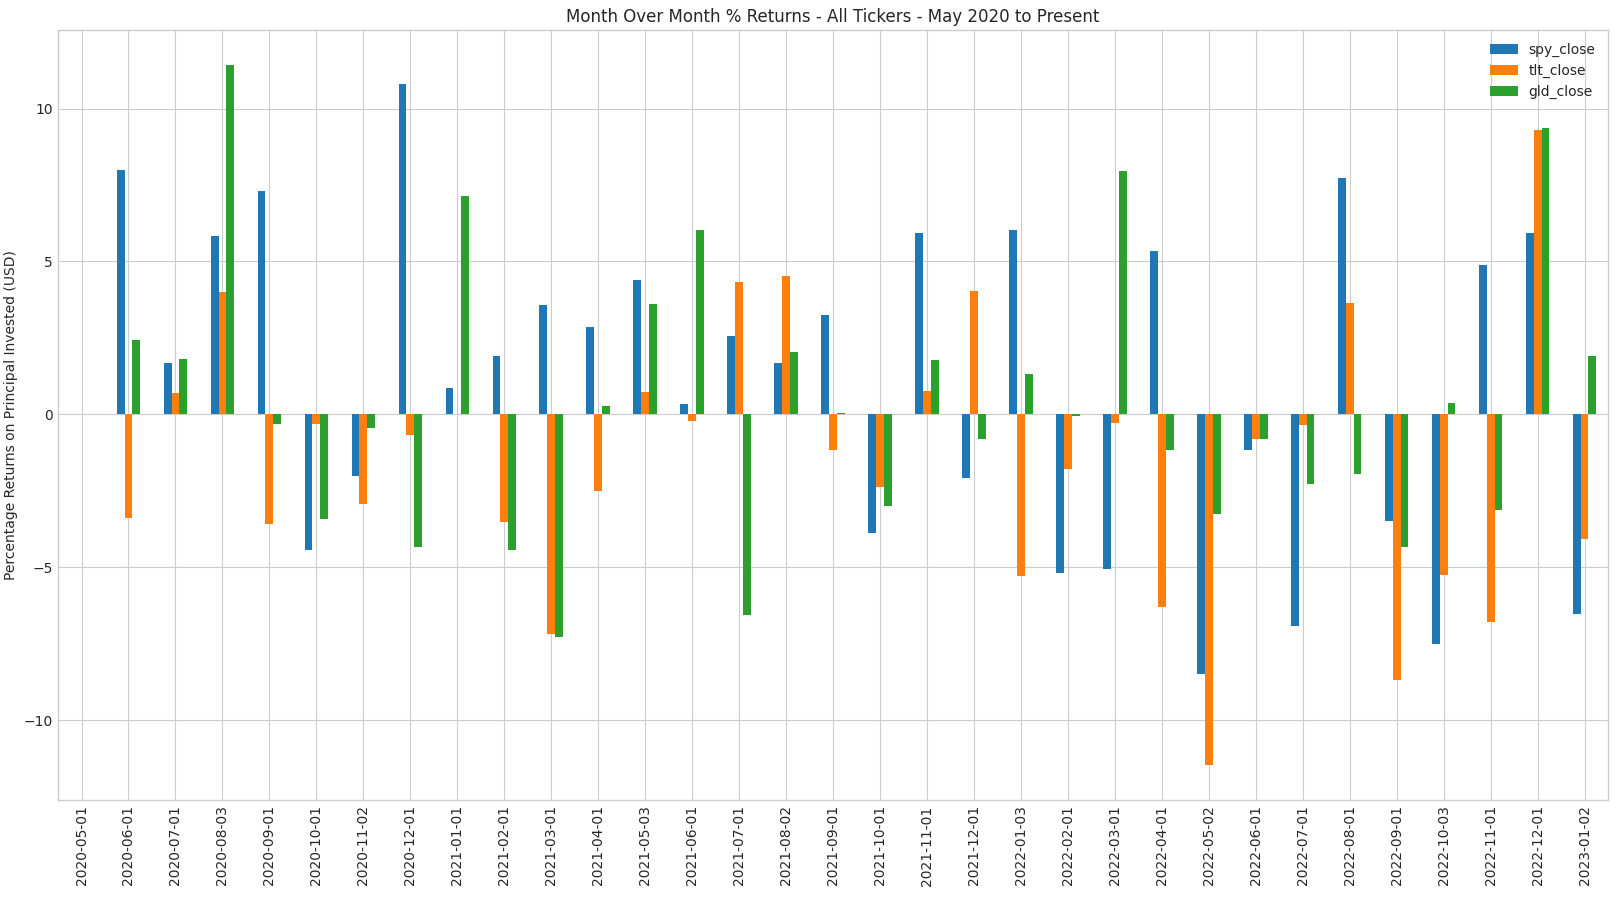

In [111]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = (df_concat*100).plot(y=['spy_close','tlt_close','gld_close'], kind='bar', figsize=(20,10), legend=True, title="Month Over Month % Returns - All Tickers - May 2020 to Present");
#     (spy_pct*100).plot(ax=ax, legend=True)
#     (gld_pct*100).plot(ax=ax, legend=True)
#     (tlt_pct*100).plot(ax=ax, legend=True)

    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
#     ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayMoMPercentageReturns.png");

In [104]:
# Month end dates plus 5/29
month_end_df = stock_df.loc[(stock_df.timestamp.dt.is_month_end) | (stock_df.timestamp.dt.day == 15), :]
month_end_df

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
4,GLD,2020-04-15,161.800,162.5400,160.8061,162.00,12141890.0,95518.0,161.749049
15,GLD,2020-04-30,160.220,160.8200,158.1300,158.80,13633483.0,107884.0,159.269773
26,GLD,2020-05-15,164.020,164.8000,163.0800,163.93,13918816.0,103072.0,164.068763
46,GLD,2020-06-15,160.520,162.5600,160.1600,162.33,8538826.0,60744.0,161.585502
57,GLD,2020-06-30,166.310,167.9906,166.1850,167.37,12762597.0,84161.0,167.268997
...,...,...,...,...,...,...,...,...,...
2076,TLT,2022-10-31,96.360,96.6200,95.0300,96.11,23956265.0,139205.0,95.885319
2087,TLT,2022-11-15,98.250,99.3000,98.1100,99.23,26585624.0,155459.0,98.868782
2097,TLT,2022-11-30,101.615,102.7300,101.3700,102.73,21594217.0,143566.0,102.184996
2108,TLT,2022-12-15,108.390,109.1200,108.1600,108.32,20255470.0,112012.0,108.578492


In [105]:
month_end_df.tail(33)

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap
1664,TLT,2021-03-15,136.4900,137.090,136.410,136.86,11366662.0,62225.0,136.721871
1676,TLT,2021-03-31,136.3400,136.590,134.980,135.45,19292467.0,97575.0,135.773342
1686,TLT,2021-04-15,139.4900,140.980,139.455,140.32,21420799.0,101084.0,140.373379
1697,TLT,2021-04-30,138.5070,138.730,137.980,138.64,15684149.0,75392.0,138.439478
1728,TLT,2021-06-15,140.8000,141.090,140.480,141.05,18177787.0,63501.0,140.863603
1739,TLT,2021-06-30,144.2500,144.930,144.070,144.35,15707427.0,76777.0,144.486788
1749,TLT,2021-07-15,147.9500,148.600,147.030,148.49,18454932.0,83696.0,148.104619
1782,TLT,2021-08-31,149.6700,150.090,148.500,148.83,15253807.0,80103.0,148.996281
1792,TLT,2021-09-15,151.2100,151.250,149.930,150.58,11936274.0,72162.0,150.558290
1803,TLT,2021-09-30,144.1000,144.515,143.650,144.32,22513240.0,109556.0,144.155056


In [ ]:
Introducing MSTR
TSLA?


In [106]:
# Filtering for month start dates
spy_monthly = stock_df[if stock_df['timestamp'] == stock_df['timestamp'].dt.is_month_start 
                       then stock_df['timestamp'].dt.is_month_start
                      
                      
                      
                      
                      ] 
spy_monthly

SyntaxError: invalid syntax (2235370338.py, line 2)

In [ ]:
# Subset of SPY only
spy_df = spy_monthly.loc[(spy_monthly.symbol == 'SPY'), :]
spy_df